# Business Problem 
* LoanTap is an online platform committed to delivering customized loan products to millennials.They provide 4 main financial instruments
* This case study will only involve to finding the parameter which impact personal loans, creating a logistic regression model to perdict wheather a person be able to fullfill debts on time or will be charged off.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)


In [7]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [11]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [12]:
#Value count for all the categorical features
for col in df.columns:
  if df[col].dtype == "O":
    print(f"Feature : {col} \n")
    print((df[col].value_counts(normalize = True)*100).round(2))
    print('-'*100)

Feature : term 

 36 months    76.26
 60 months    23.74
Name: term, dtype: float64
----------------------------------------------------------------------------------------------------
Feature : grade 

B    29.30
C    26.76
A    16.21
D    16.04
E     7.95
F     2.97
G     0.77
Name: grade, dtype: float64
----------------------------------------------------------------------------------------------------
Feature : sub_grade 

B3    6.73
B4    6.46
C1    5.97
C2    5.70
B2    5.68
B5    5.58
C3    5.36
C4    5.12
B1    4.84
A5    4.68
C5    4.61
D1    4.04
A4    3.99
D2    3.52
D3    3.09
D4    2.94
A3    2.67
A1    2.46
D5    2.45
A2    2.42
E1    2.00
E2    1.88
E3    1.57
E4    1.35
E5    1.15
F1    0.89
F2    0.70
F3    0.58
F4    0.45
F5    0.35
G1    0.27
G2    0.19
G3    0.14
G4    0.09
G5    0.08
Name: sub_grade, dtype: float64
----------------------------------------------------------------------------------------------------
Feature : emp_title 

Teacher                    1.

In [13]:
#Proprotion of target variable
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

## Insights
* Many features are object type and hence can't be used directly and need to be encoded first.
* The dataset is also unbalanced.
* 76% people have 36 month term and rest has 60 months of term.
* Nearly 26% people belongs to B grade followed by C grade.
* 33% of the people who apply for loans have 10+ years of experience.
* 50% of home owenership is Mortage based and 40% is rent.
* Verifaction status is almost identical.
* 60% of the times debt consolidation is the reason for loan and 20% for credit cards.
* Nearly 99% of the loans is applied by individual applicant.
* Data is also unbalanced as expected.

### Checking and Treating missing values

In [14]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [15]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    print(col + '\n')
    print(df[df[col].isnull() == True]['loan_status'].value_counts(normalize=True))

emp_title

Fully Paid     0.740786
Charged Off    0.259214
Name: loan_status, dtype: float64
emp_length

Fully Paid     0.724714
Charged Off    0.275286
Name: loan_status, dtype: float64
title

Fully Paid     0.812536
Charged Off    0.187464
Name: loan_status, dtype: float64
revol_util

Fully Paid     0.771739
Charged Off    0.228261
Name: loan_status, dtype: float64
mort_acc

Fully Paid     0.853155
Charged Off    0.146845
Name: loan_status, dtype: float64
pub_rec_bankruptcies

Fully Paid     0.837383
Charged Off    0.162617
Name: loan_status, dtype: float64


* Data overall is imbalanced and henced we need to be carefull while imputation.

## Does location affects the loan stats?

* H0 : Approving loan is independent of location
* H1 : Approving loans is dependent of location

* Aplha = 0.05
* Using chi square test we will check wheather approving loans is dependent of location or not

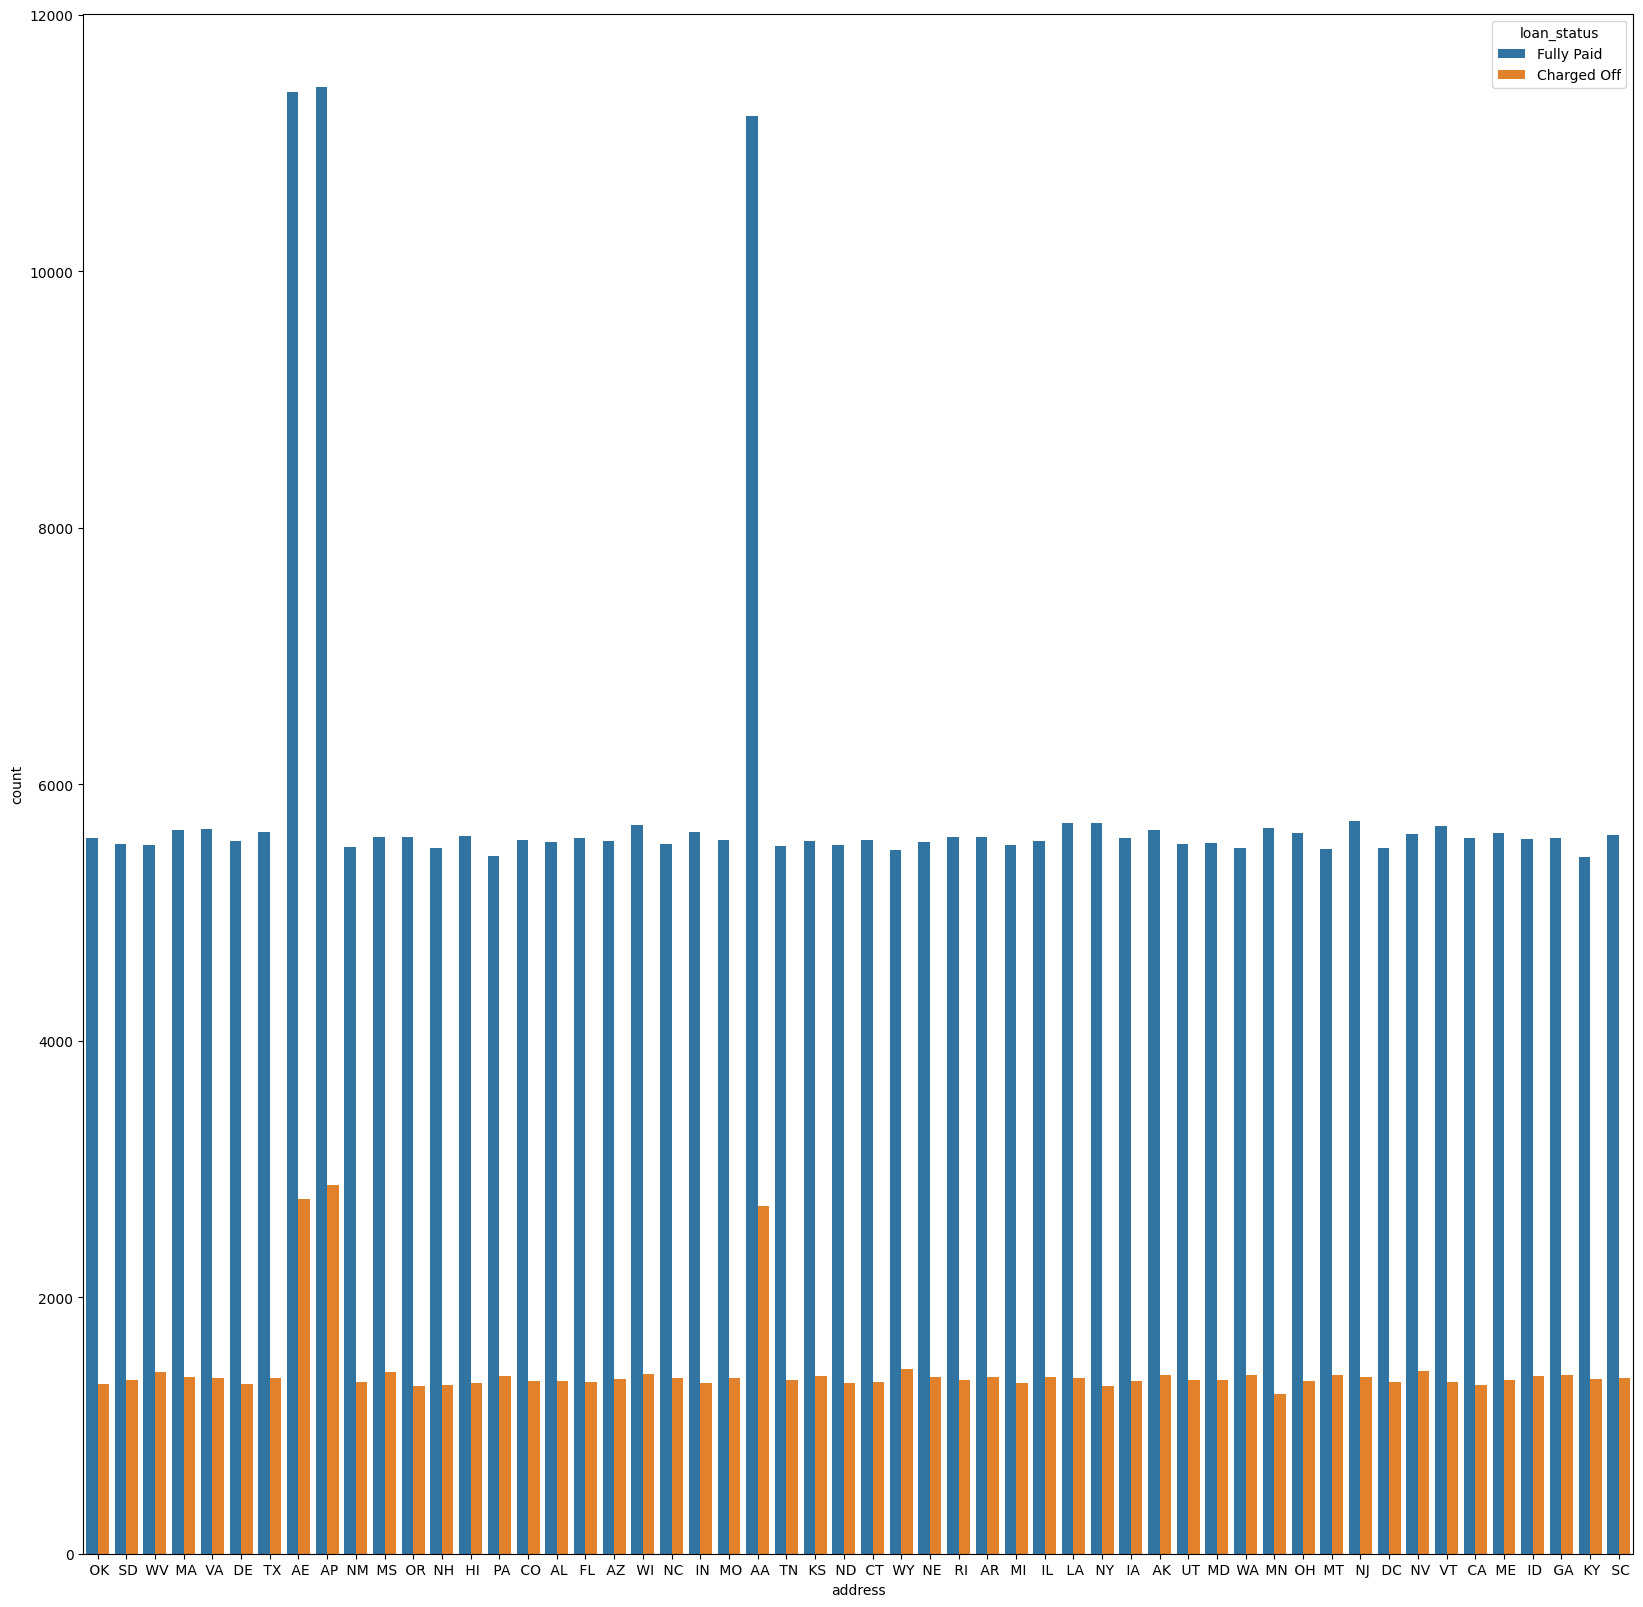

In [17]:
from scipy.stats.contingency import chi2_contingency
import re

df['address'] = df['address'].apply(lambda x : re.search('(\ [A-Z]{2})',x).group(0))

plt.figure(figsize = (20,20))
sns.countplot(data=df, x = 'address', hue = 'loan_status')
plt.show()

obs = pd.crosstab(index = df['address'], columns = df['loan_status'])

ch2, p_value, dof, expected = chi2_contingency(observed = obs)

In [18]:
p_value

0.6495028321544145

## Insights
* Since p_value is greater than alpha(0.05) we fail to reject null hypotheis and hence conclude that loan approvals are independent of locations.


## Imputation 

In [19]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
num_col = [col for col in df.columns if df[col].dtype != 'O' ]

In [20]:
#Finding numerical columns with missing values
# print(f"Numerical columns with missing values are {num_col}")

#Treating missing values
from sklearn.impute import KNNImputer

nan = np.nan

knn_imputer = KNNImputer(n_neighbors = 5)
df[num_col] = knn_imputer.fit_transform(X = df[num_col], y = df['loan_status'] )

In [21]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[cat_col] = si.fit_transform(df[cat_col], df['loan_status'])

In [22]:
#Partitionaning data into SEEN and UNSEEN
y = df['loan_status'].copy()
y = y.map({'Fully Paid': 0, 'Charged Off':1})
x = df.drop('loan_status',axis = 1).copy()


from sklearn.model_selection import train_test_split

df_train, df_test, df_target_train, df_target_test = train_test_split(x,y, test_size = .20)

In [23]:
df_eda = pd.concat([df_train, df_target_train], axis = 1)

In [24]:
df_eda.drop('address',axis = 1,inplace = True)

In [25]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316824 entries, 161123 to 17530
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             316824 non-null  float64
 1   term                  316824 non-null  object 
 2   int_rate              316824 non-null  float64
 3   installment           316824 non-null  float64
 4   grade                 316824 non-null  object 
 5   sub_grade             316824 non-null  object 
 6   emp_title             316824 non-null  object 
 7   emp_length            316824 non-null  object 
 8   home_ownership        316824 non-null  object 
 9   annual_inc            316824 non-null  float64
 10  verification_status   316824 non-null  object 
 11  issue_d               316824 non-null  object 
 12  purpose               316824 non-null  object 
 13  title                 316824 non-null  object 
 14  dti                   316824 non-null  float64
 

In [26]:
df_eda.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_status             0
dtype: int64

## Graphical analysis

C:\Users\yasee\AppData\Local\Temp\ipykernel_12268\3320115210.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


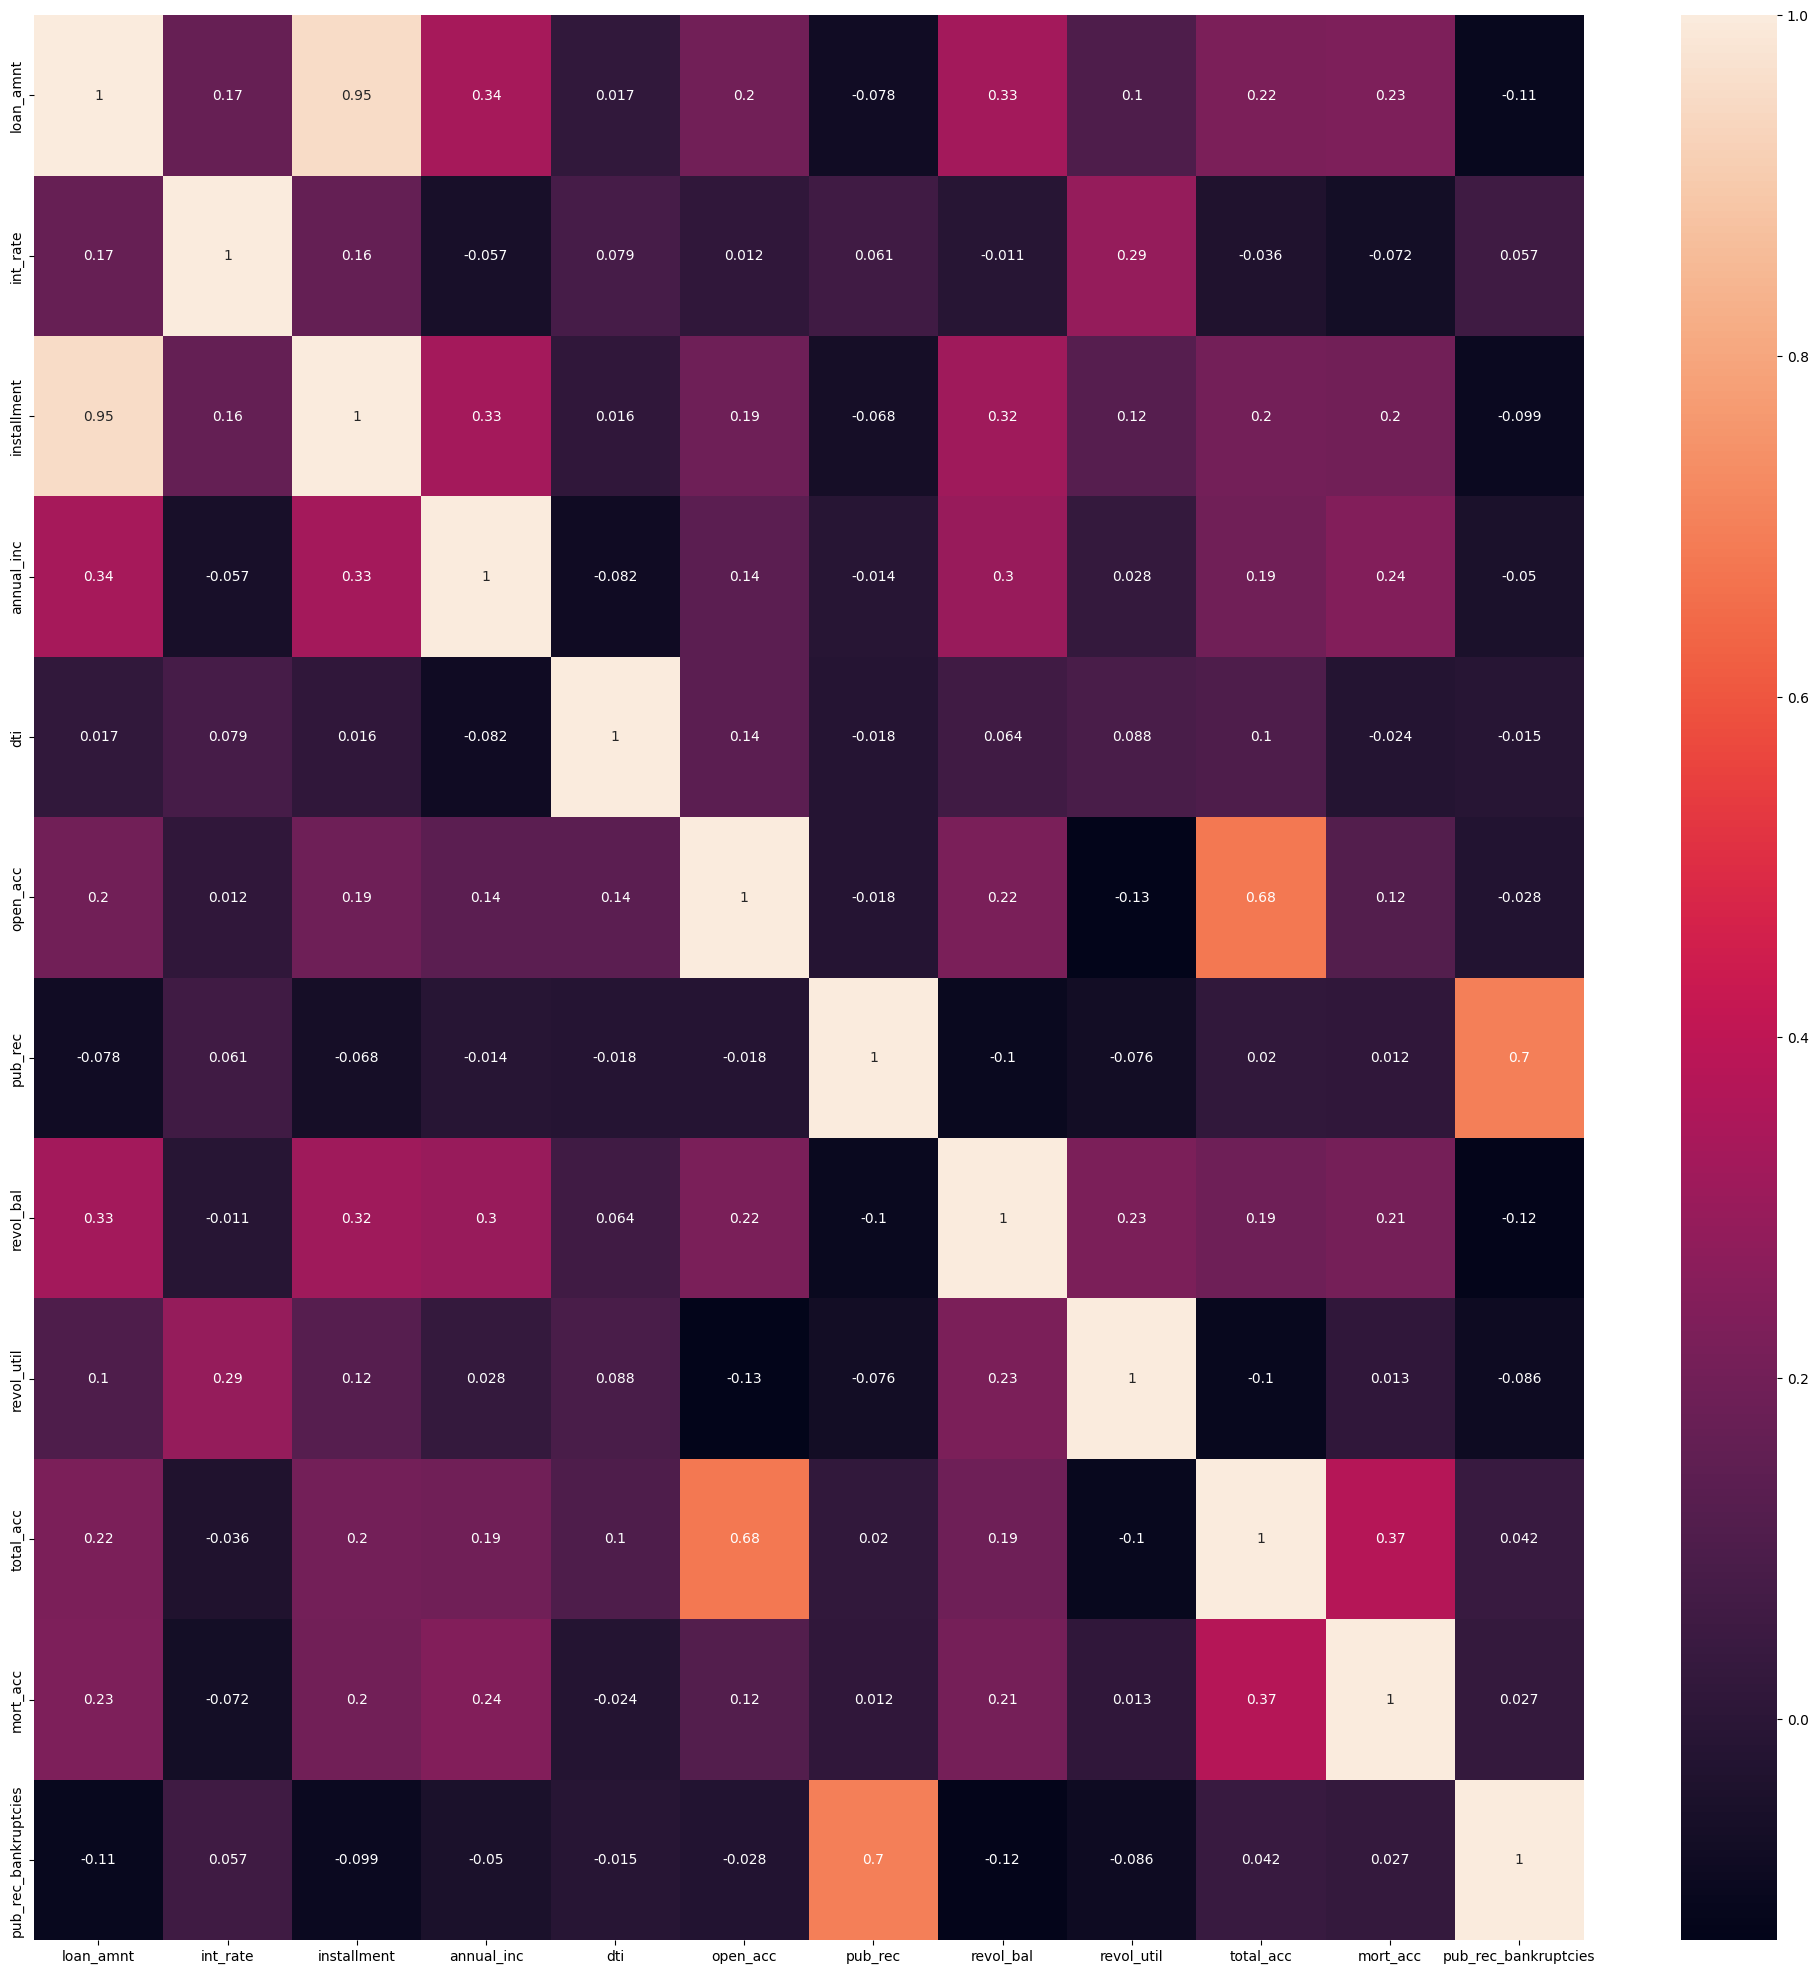

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

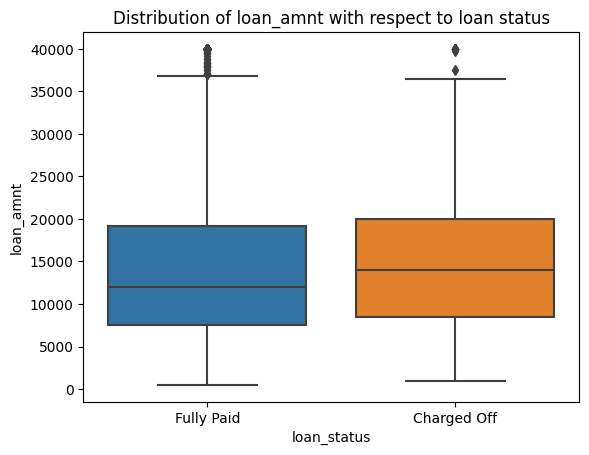

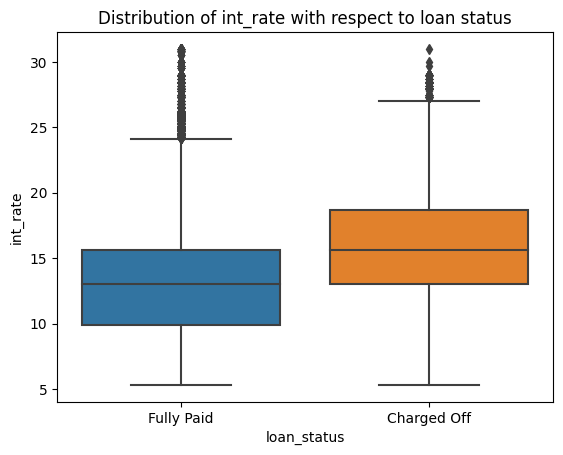

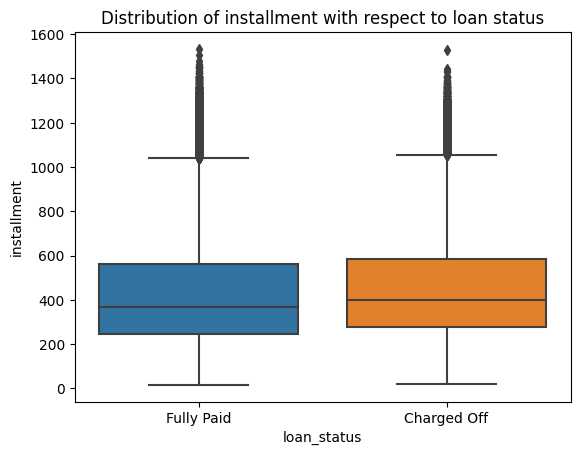

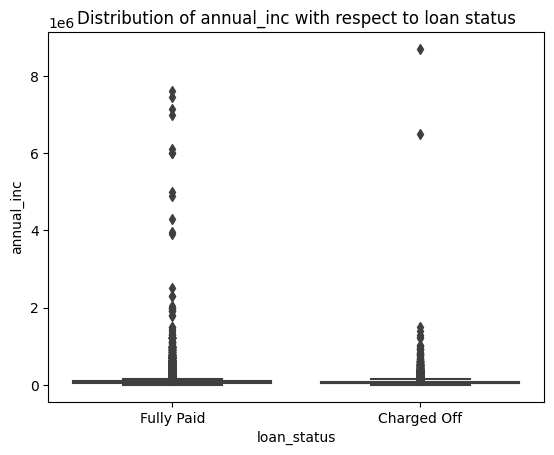

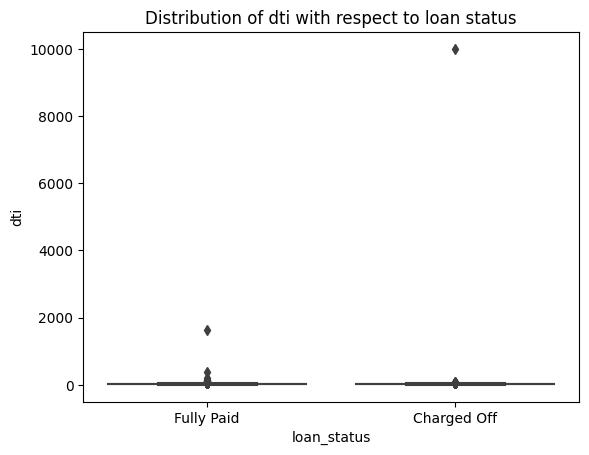

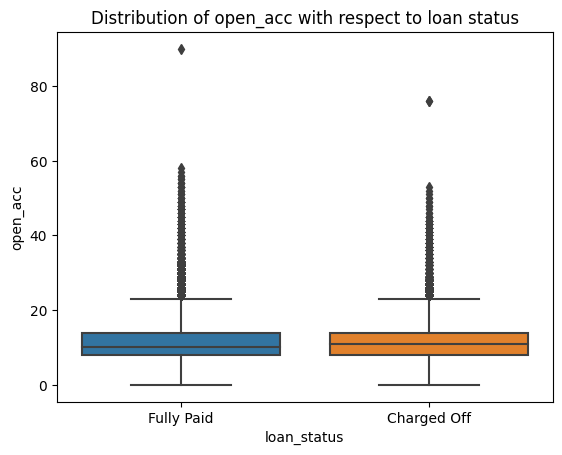

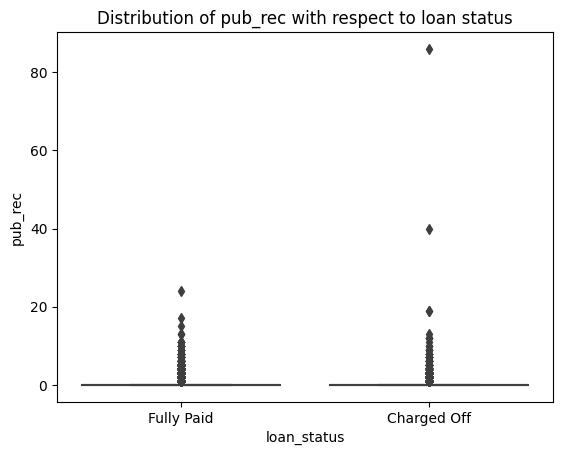

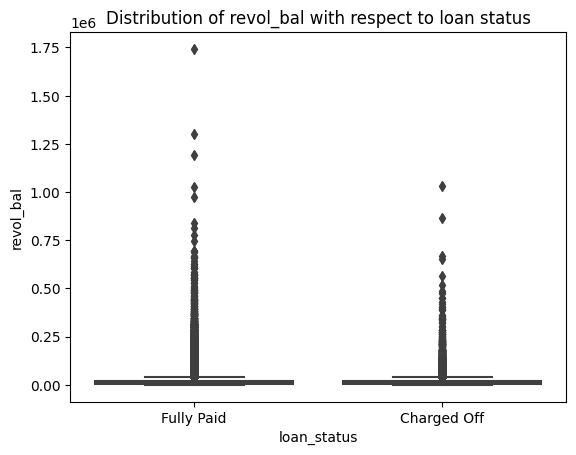

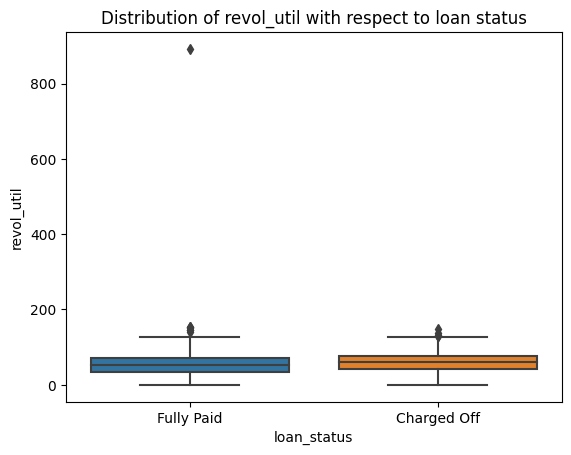

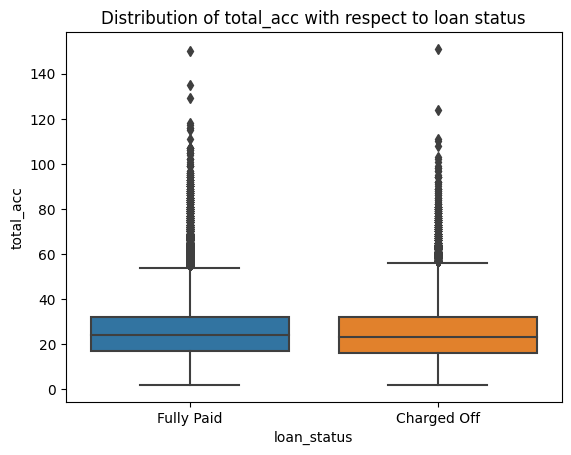

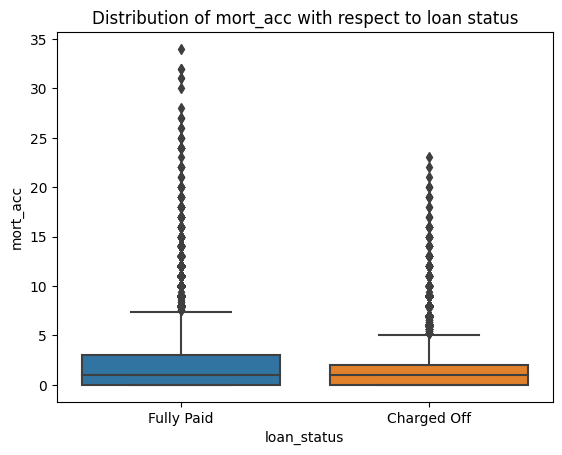

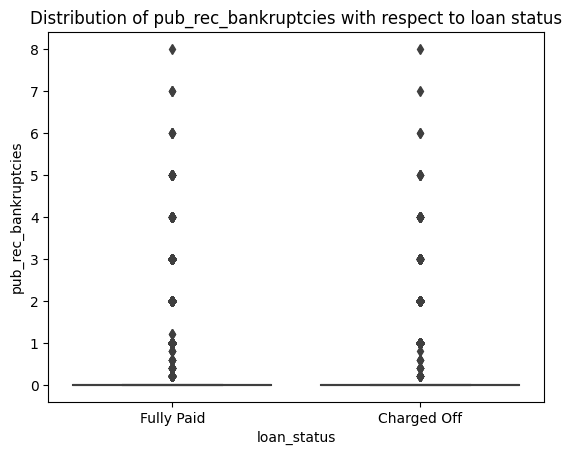

In [28]:

for col in df_eda.columns:
  if df_eda[col].dtype != 'O' and col != 'loan_status':
    sns.boxplot(x = df['loan_status'],y = df[col])
    plt.title(f"Distribution of {col} with respect to loan status")
    plt.show()
    print()



## Insights
* The median loan amount for people who are beign charged off is higher than those who are successfully able to pay their debts.
* The distribution rate is also higher for those people who are being charged off.
* The distribution is installments is nearly same.
* The annual income is highly skewed for all the classes(Fully paid, charged off).
* Alot of outliers are also present in the data as well.


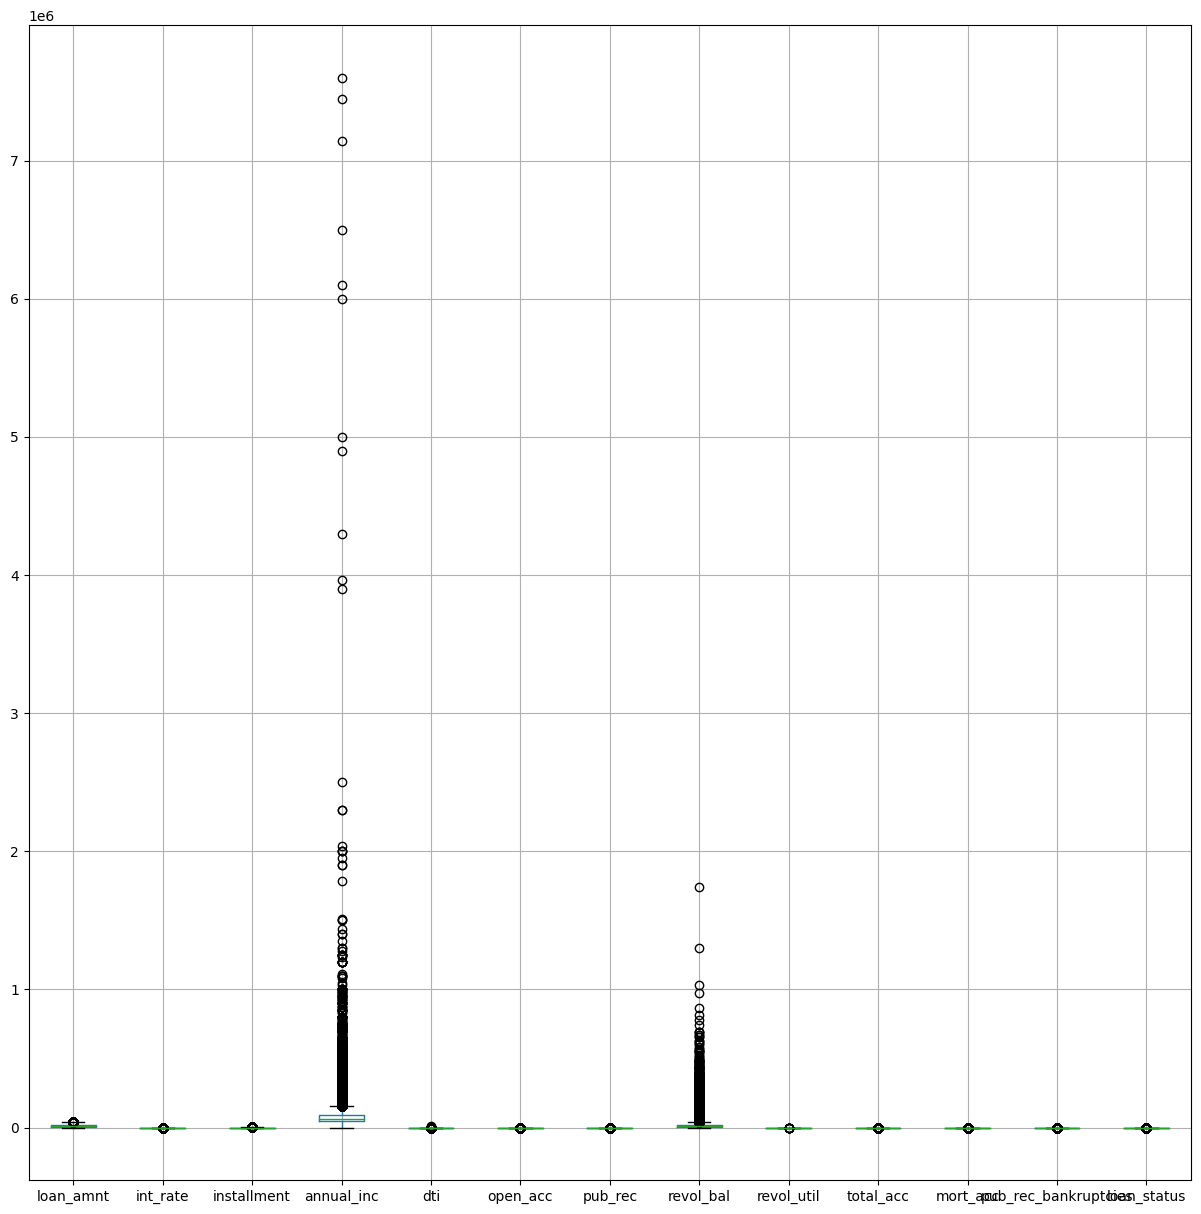

In [29]:
df_eda.boxplot(figsize = (15,15))
plt.show()

## Insights
* For numerical columns KNN imputation is used.
* For categorical columns Simple Imputer is used.
* Test and train data has been splited to avoid any data leakage.
* From the above plots it is evident that data contains many outliers.


# Note
* While treating outliers we need to keep in mind that not every thing which seems an outliers should be removed.
* Deleting data based on traditional IRQ would be invalid as they will cause loss of information and hence not all the columns are in need of outliers treatment.

### Outliers treatment

In [31]:
outlier_col = ['loan_amnt', 'int_rate', 'term']

In [32]:
# Outliers treatment 
for col in outlier_col:
  if (df_eda[col].dtype == 'int' or df_eda[col].dtype == 'float') and (col != 'loan_status'):
    print(col)
    q = np.quantile(df_eda[col],0.99)
    df_eda = df_eda[df_eda[col] <= np.quantile(df_eda[col], 0.99)]

loan_amnt
int_rate


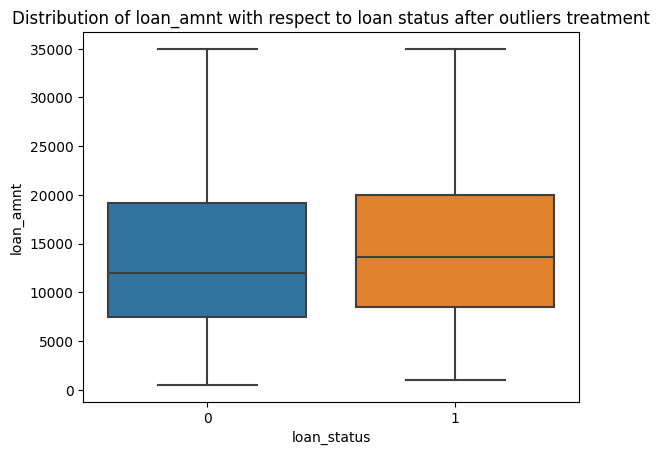

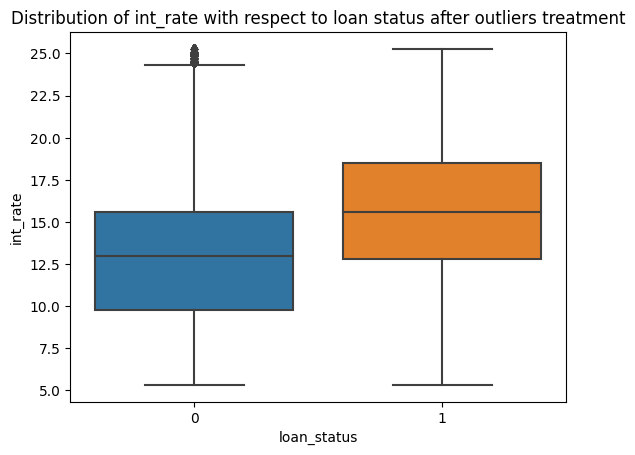

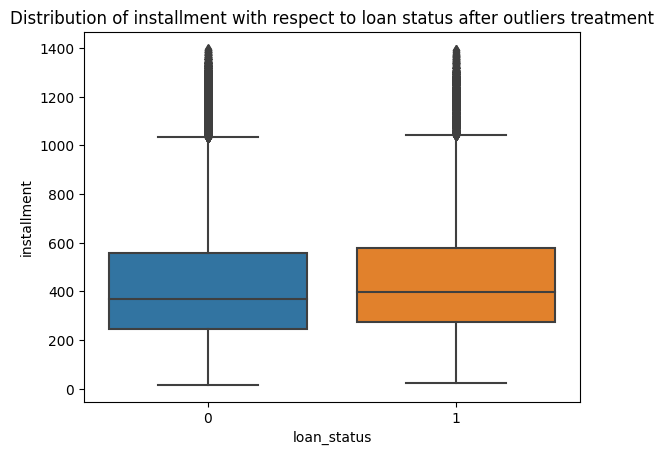

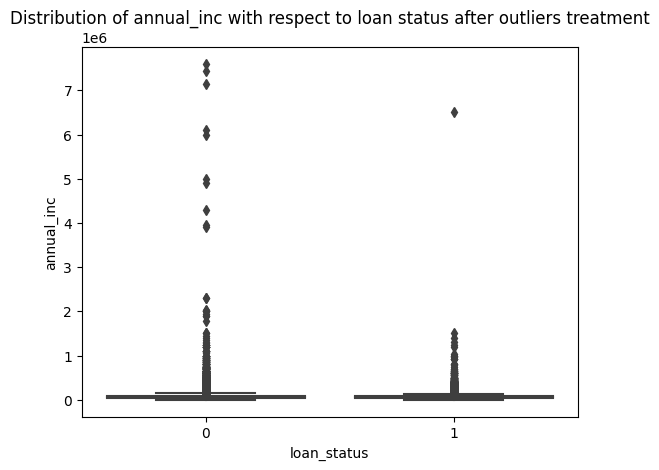

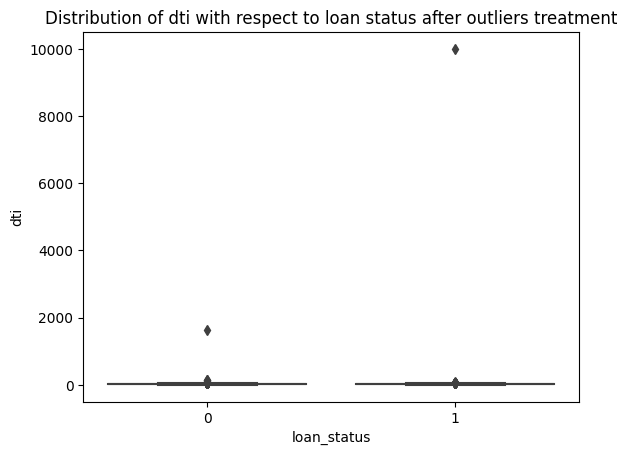

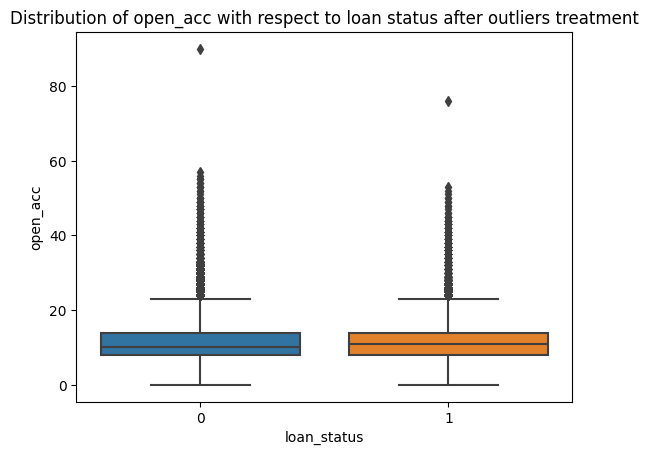

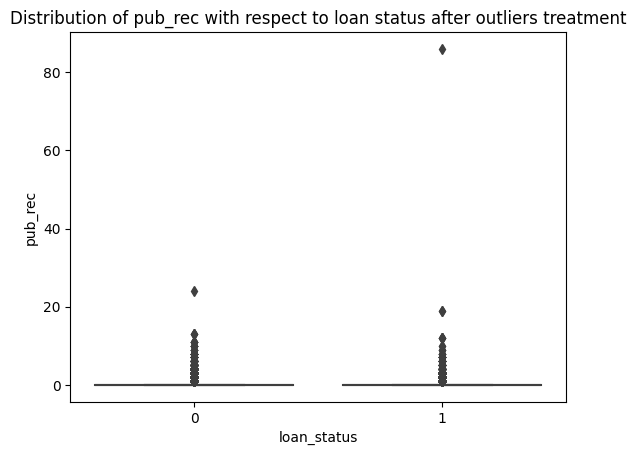

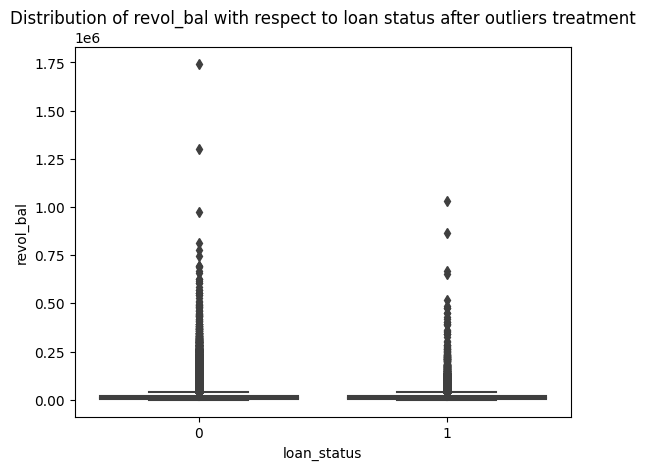

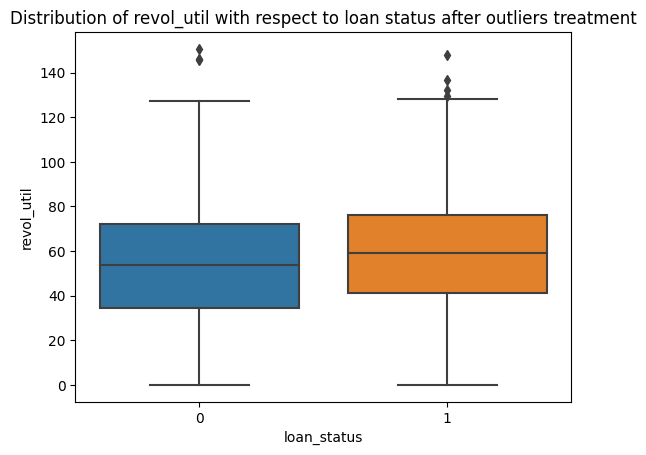

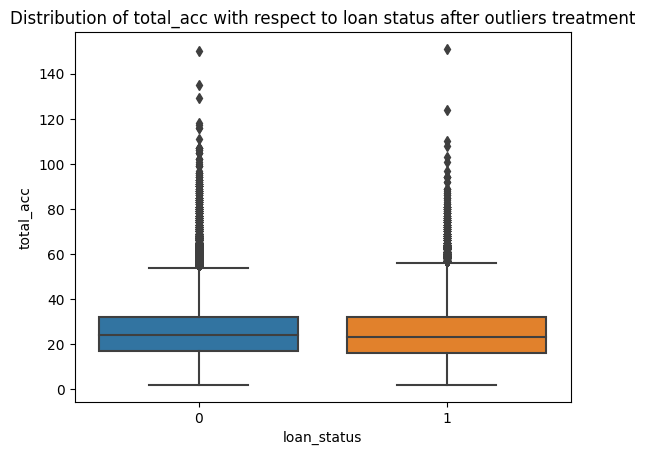

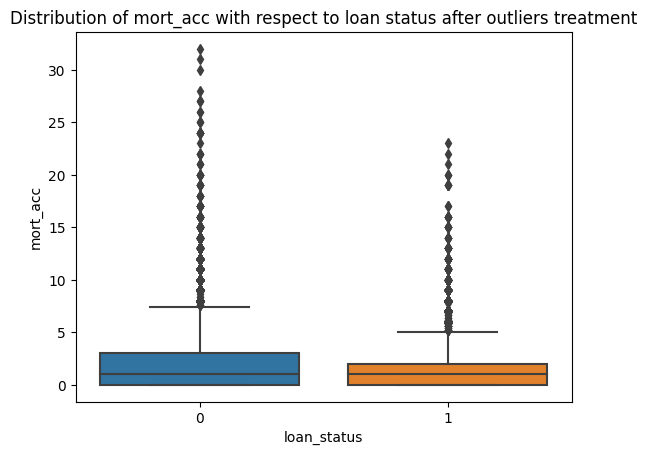

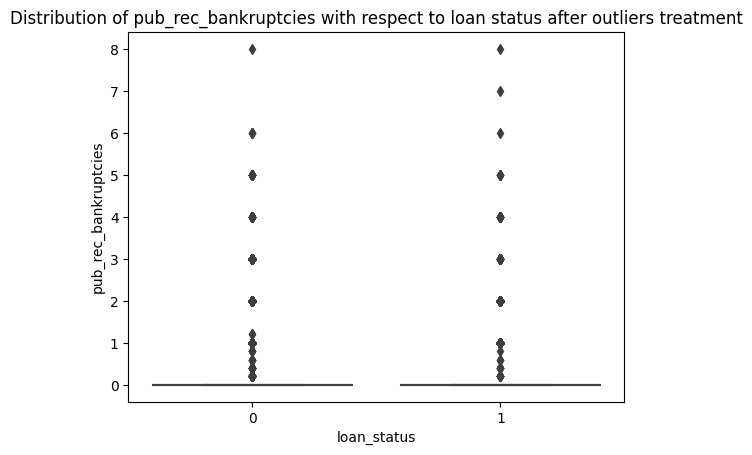

In [33]:
for col in df_eda.columns:
  if df_eda[col].dtype != 'O' and col != 'loan_status':
    sns.boxplot(x = df_eda['loan_status'],y = df_eda[col])
    plt.title(f"Distribution of {col} with respect to loan status after outliers treatment")
    plt.show()
    print()

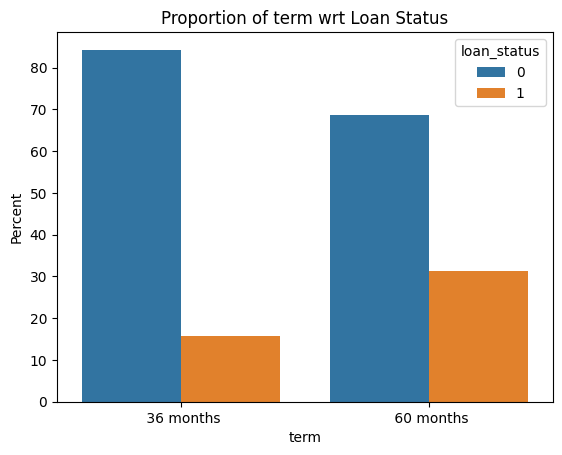

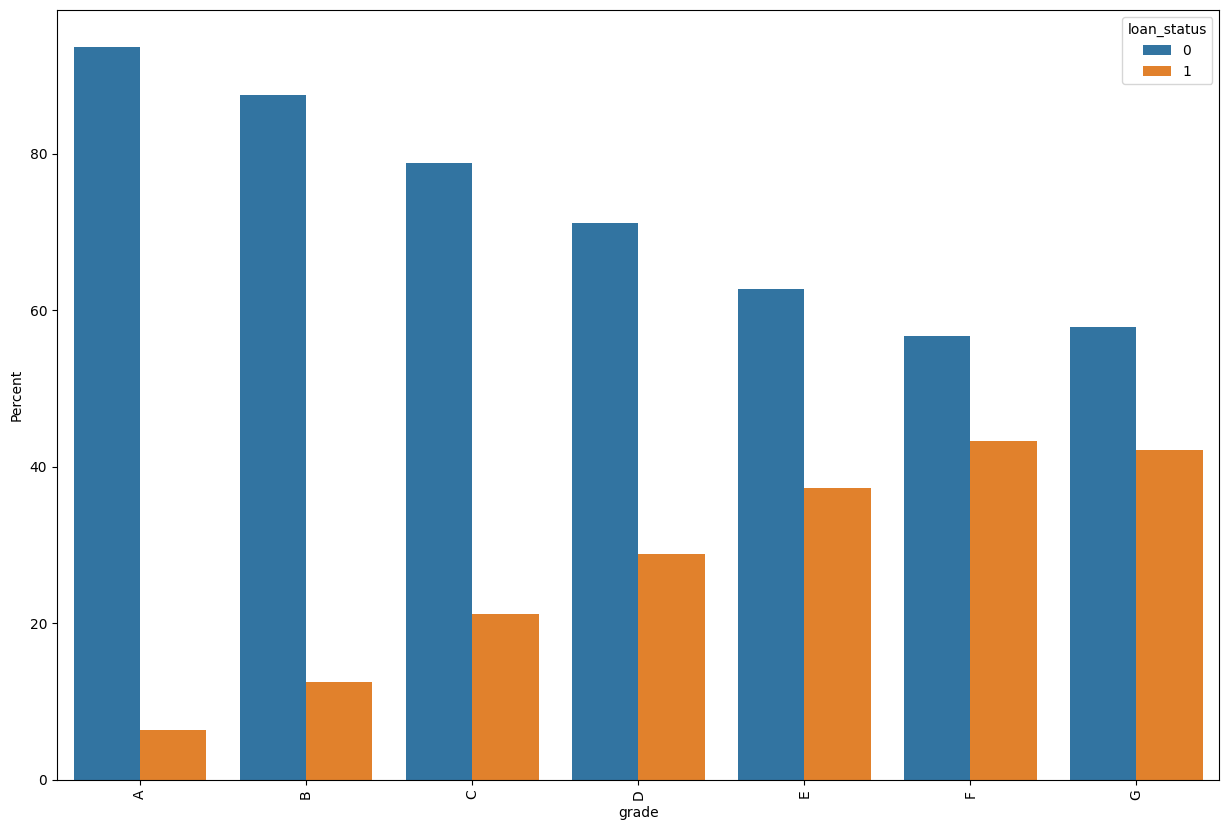

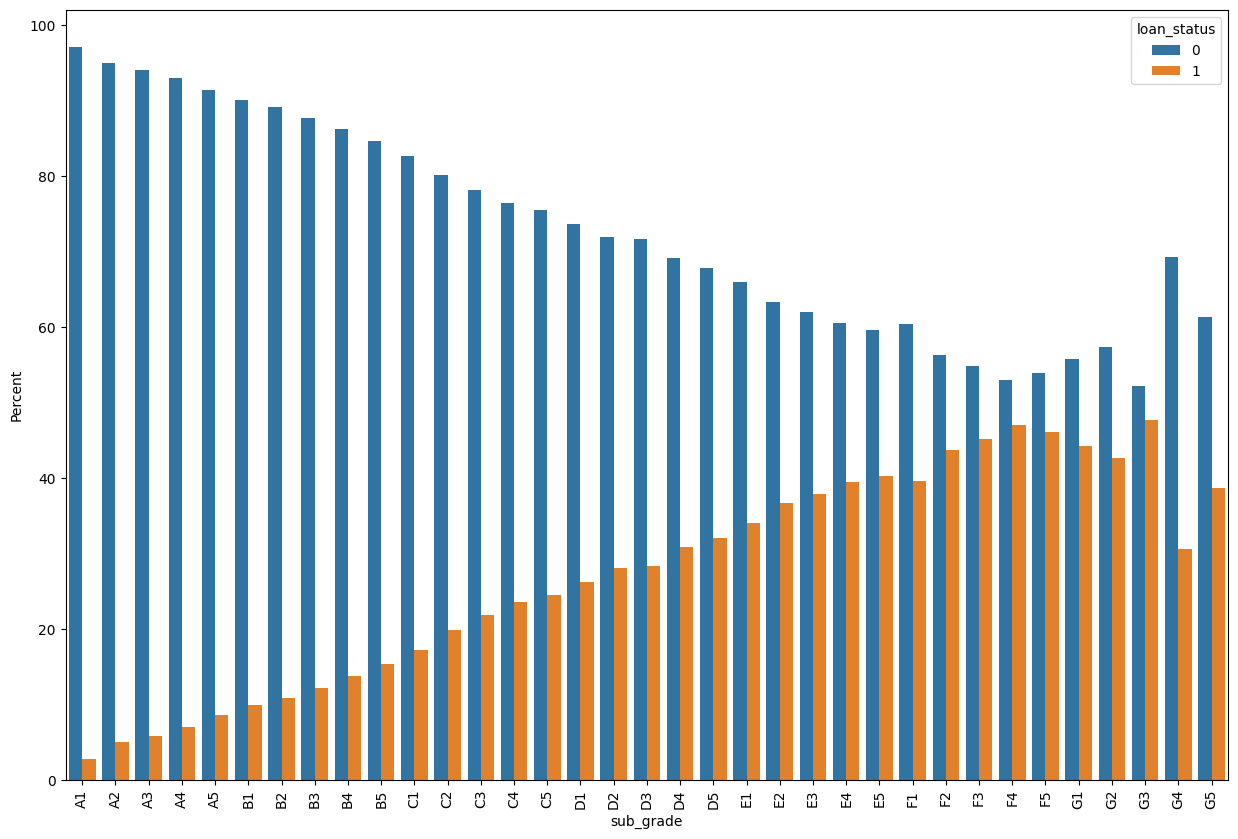

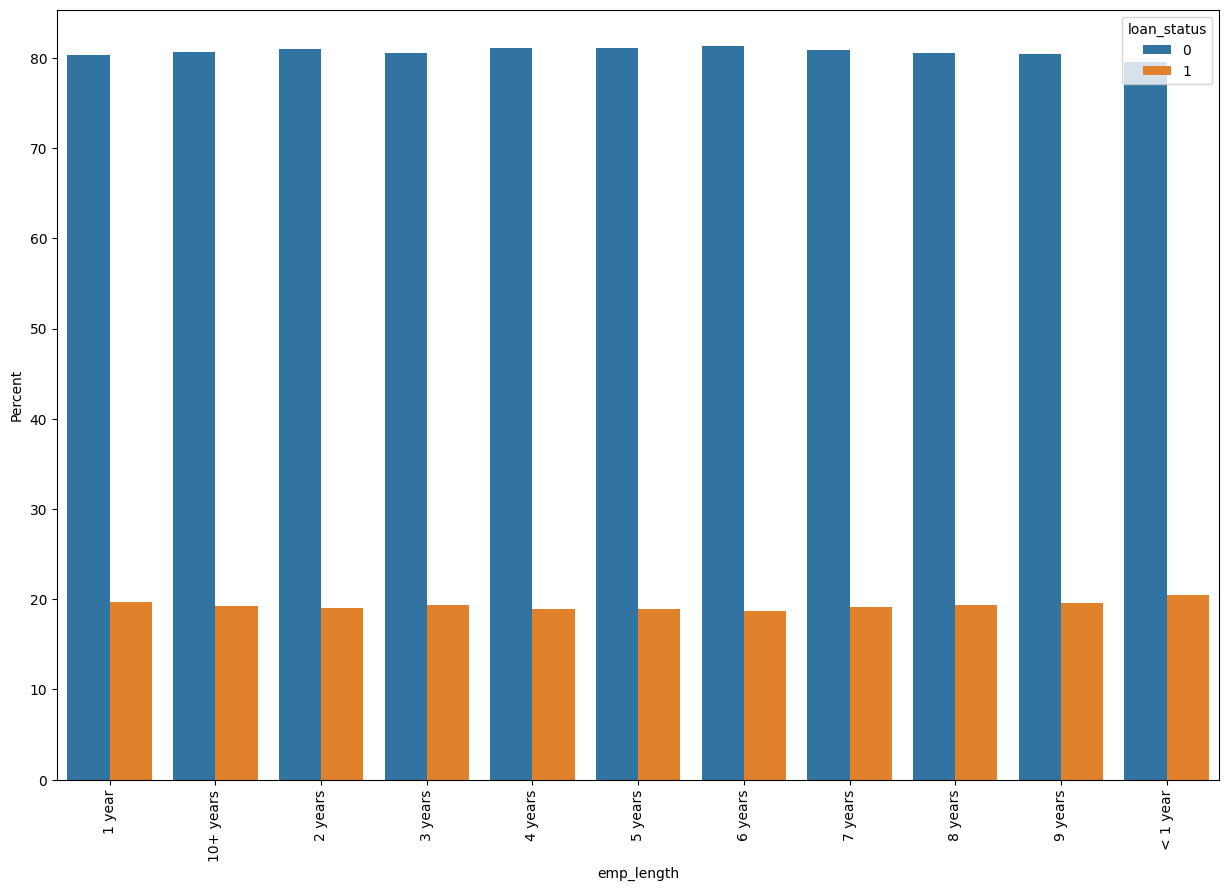

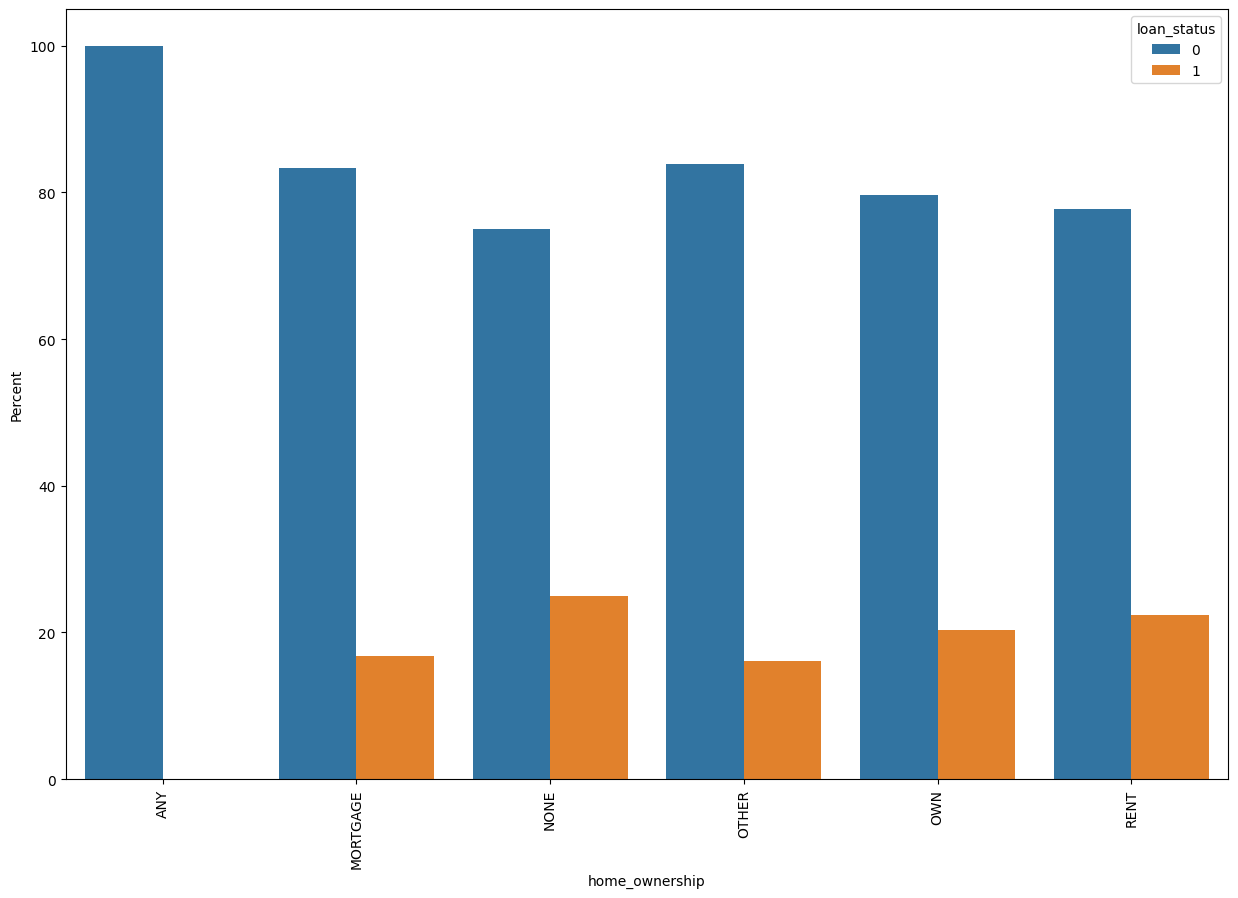

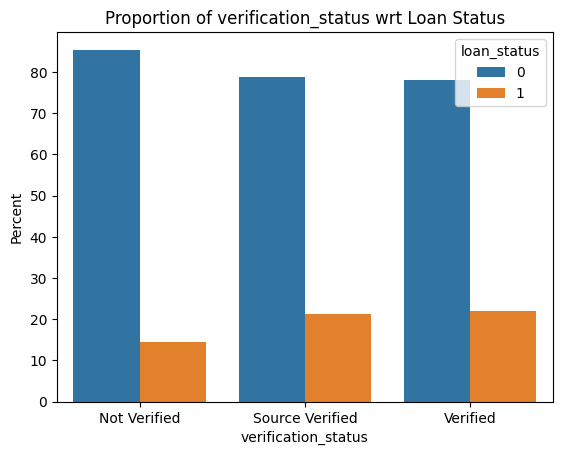

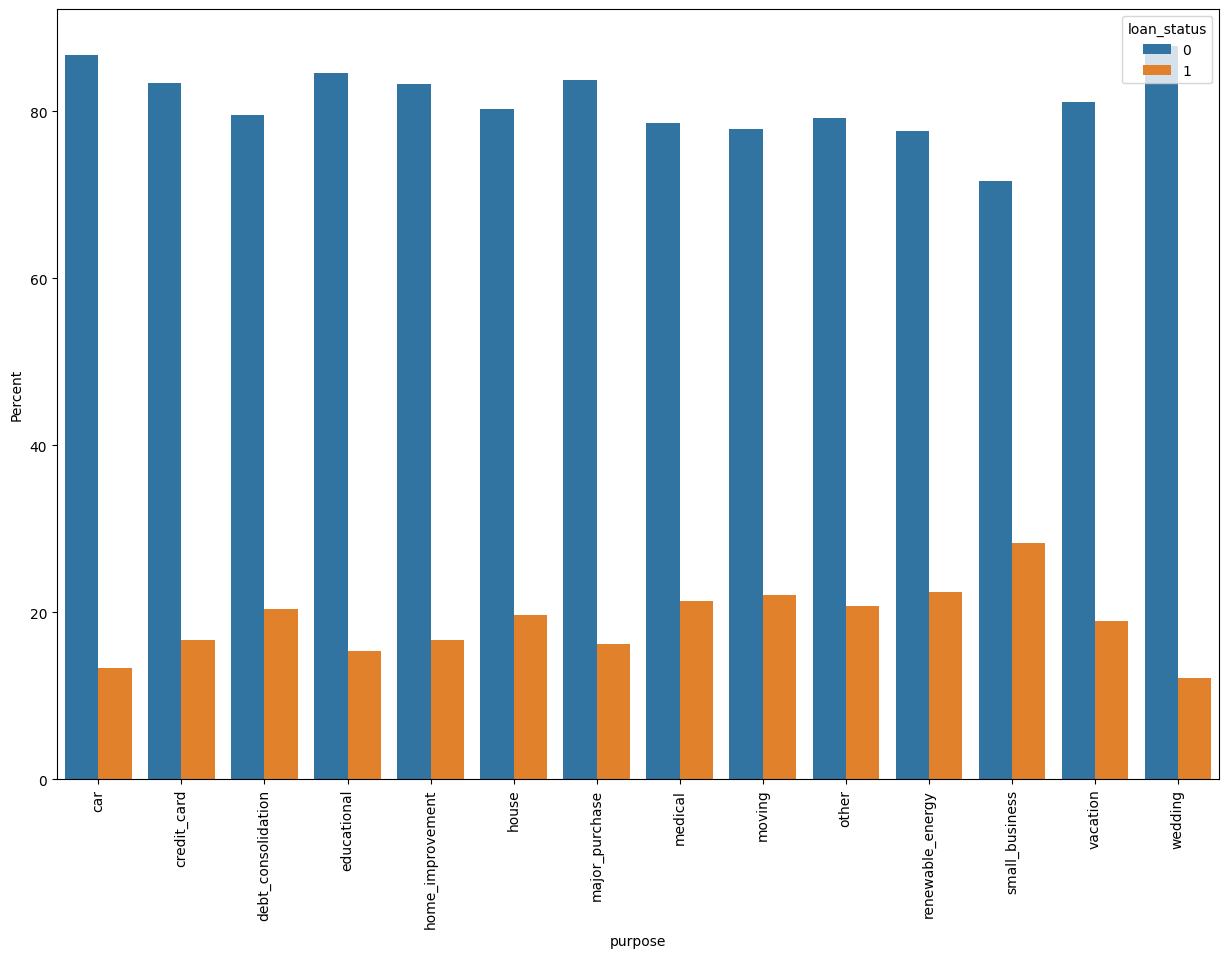

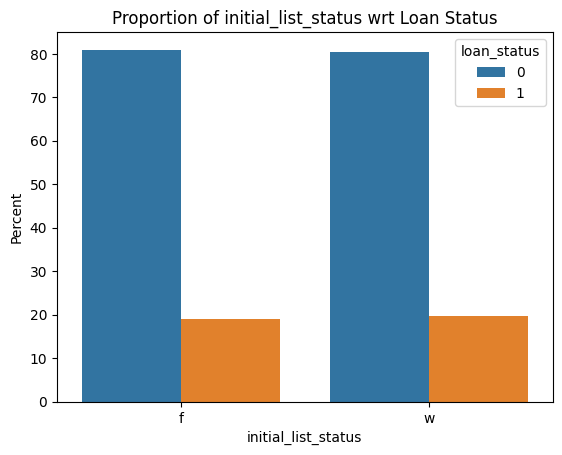

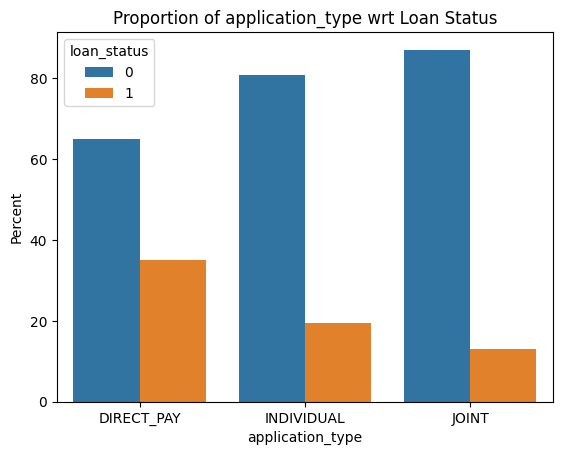

In [127]:
for col in df_eda.columns:
  if df_eda[col].dtype == 'O' and col not in ['emp_title', 'issue_d', 'title', 'address', 'earliest_cr_line','loan_status']:
    if len(((df_eda.groupby(col)['loan_status'].value_counts(normalize = True) * 100).round(2)).rename('Percent').reset_index()) > 10:
      plt.figure(figsize = (15,10))
      sns.barplot(data = ((df_eda.groupby(col)['loan_status'].value_counts(normalize = True) * 100).round(2)).rename('Percent').reset_index(), x = col, y = 'Percent', hue = 'loan_status')
      plt.xticks(rotation = 90)
      plt.show()
    else:
      sns.barplot(data = ((df_eda.groupby(col)['loan_status'].value_counts(normalize = True) * 100).round(2)).rename('Percent').reset_index(), x = col, y = 'Percent', hue = 'loan_status')
      plt.title(f"Proportion of {col} wrt Loan Status")
      plt.show()

    


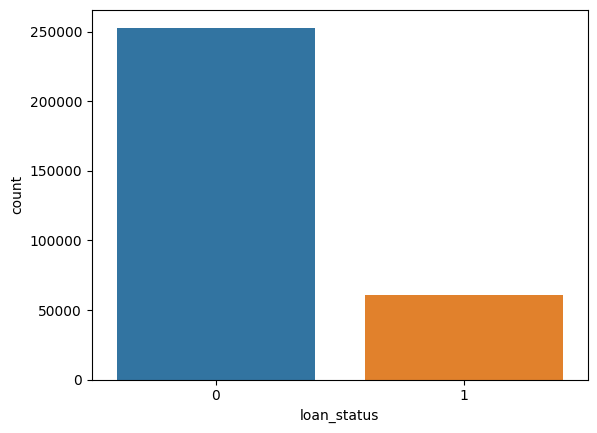

In [36]:
sns.countplot(data= df_eda, x = 'loan_status')
plt.show()

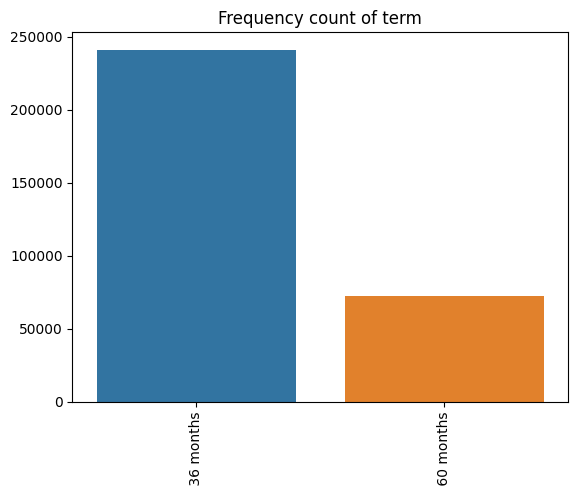

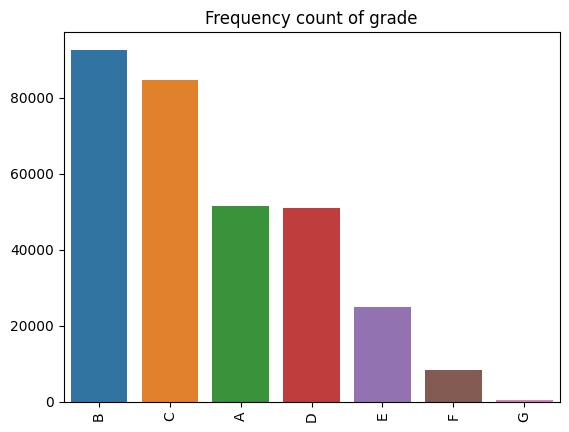

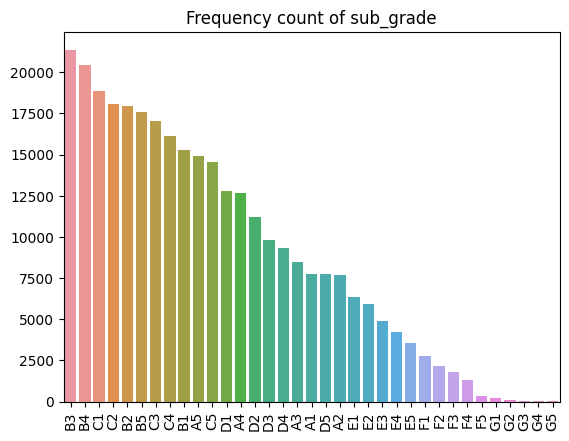

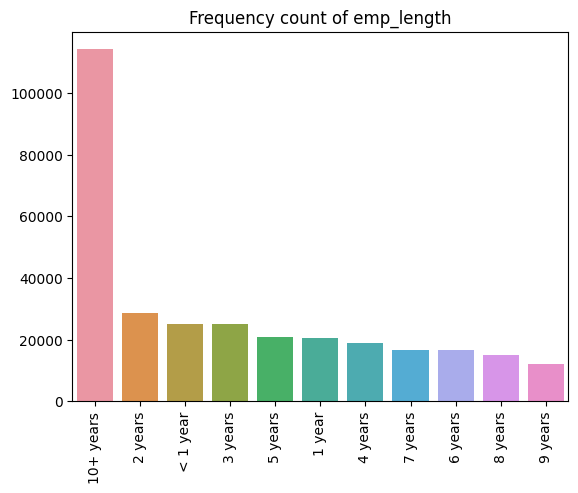

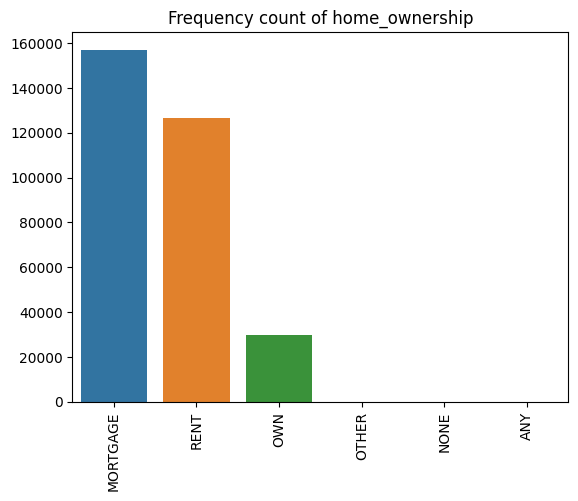

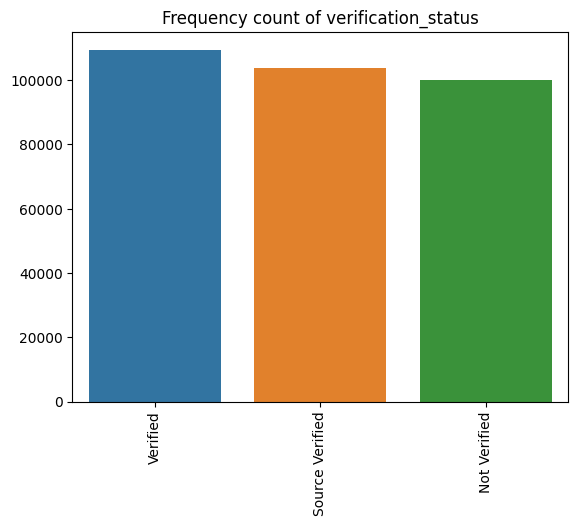

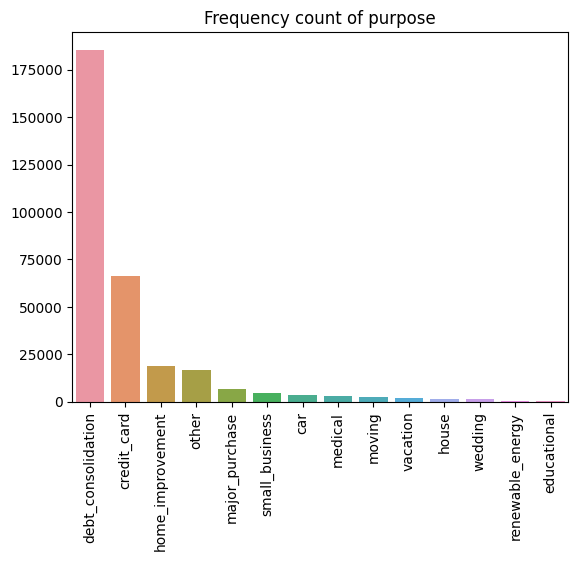

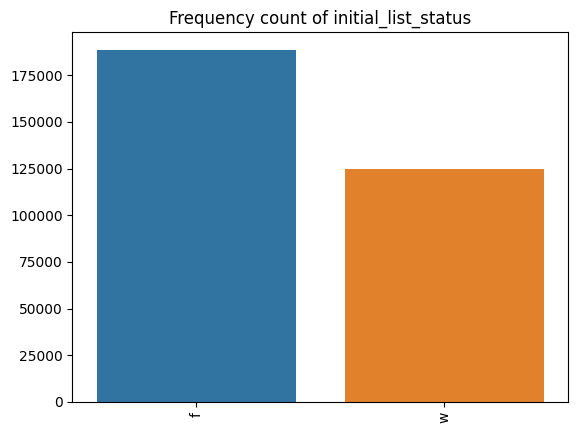

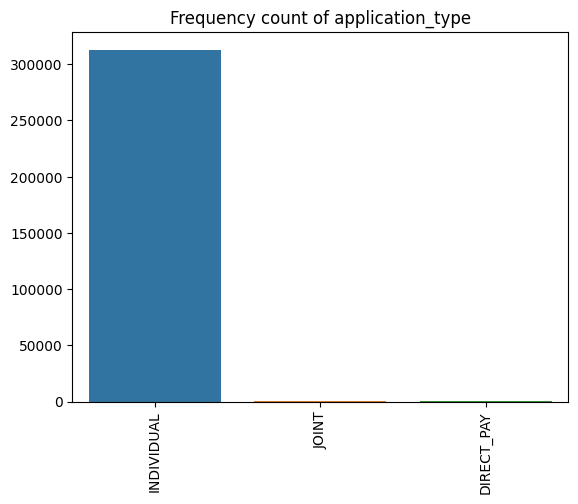

In [113]:
for col in df_eda.columns:
    if df_eda[col].dtype == 'O' and len(df_eda[col].value_counts()) < 100:
        
        sns.barplot(x = df_eda[col].value_counts().index, y = df_eda[col].value_counts().values)
        plt.xticks(rotation = 90)
        plt.title(f"Frequency count of {col}")
        plt.show()

In [37]:
(df_eda['loan_status'].value_counts(normalize = True)*100).round(2)

0    80.68
1    19.32
Name: loan_status, dtype: float64

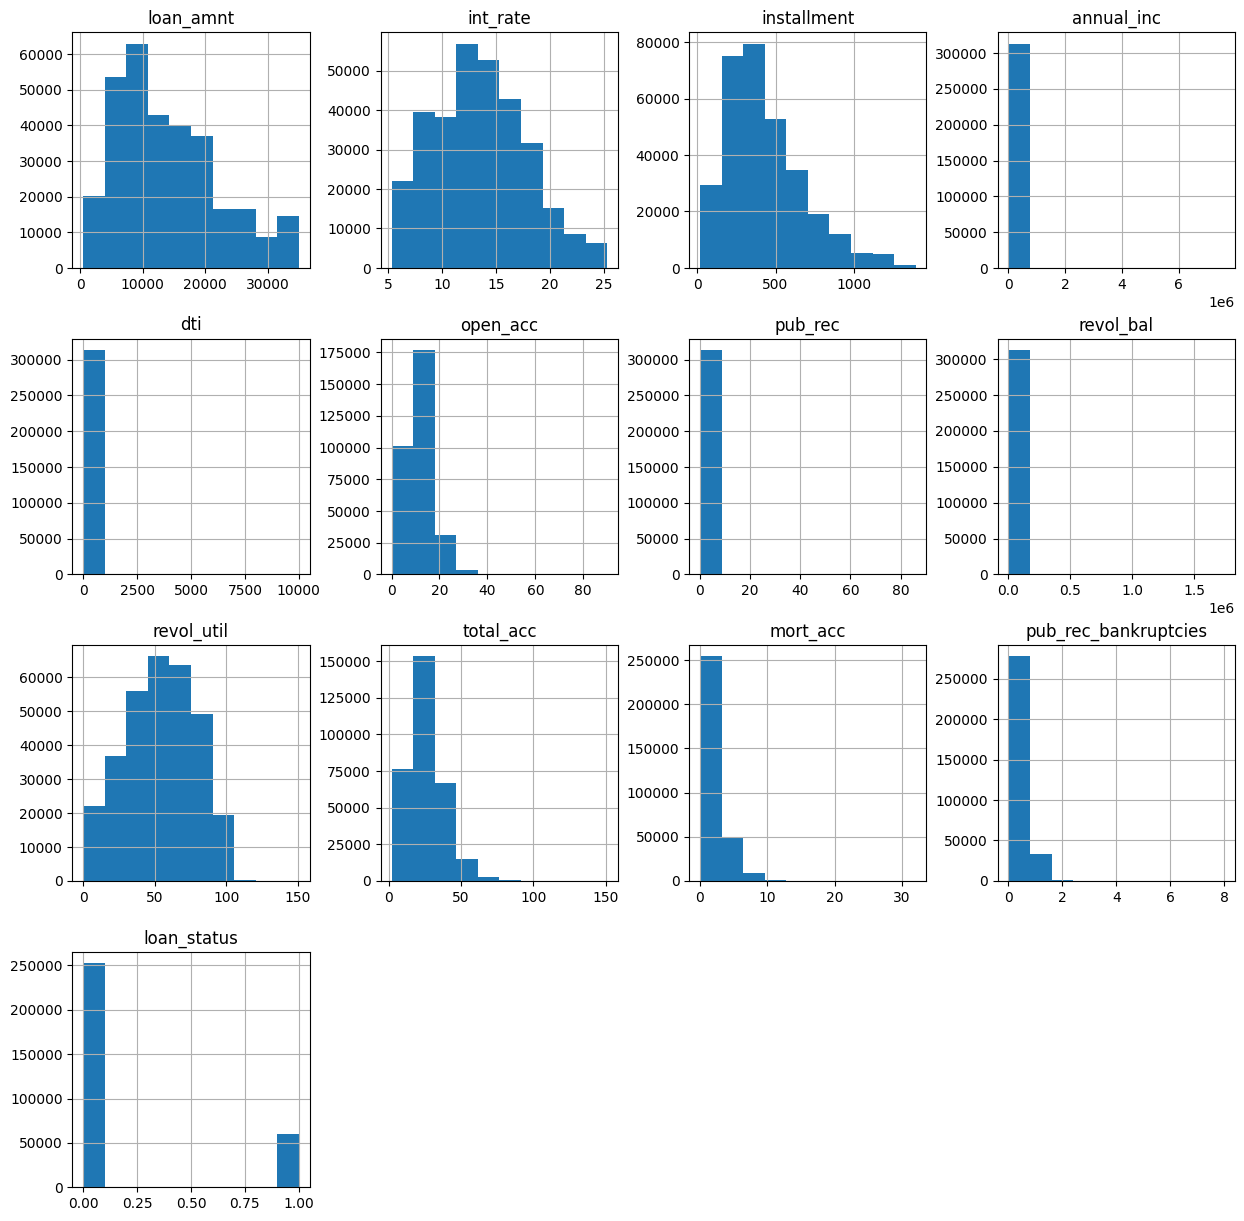

In [38]:
df_eda.hist(figsize = (15,15))
plt.show()

<AxesSubplot: xlabel='loan_amnt', ylabel='Density'>

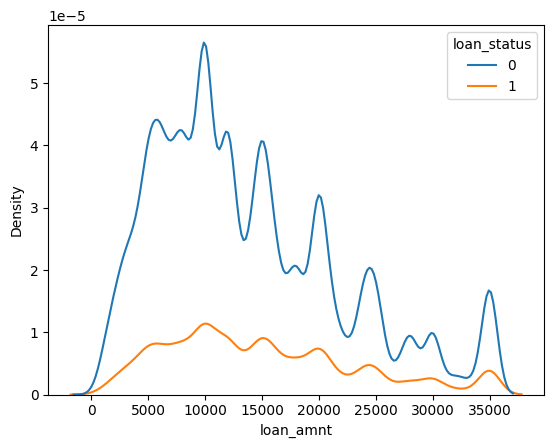

In [117]:
sns.kdeplot(data = df_eda, x = 'loan_amnt', hue = 'loan_status')
plt.title('Distribution of loan amount for different categories')
plt.show()

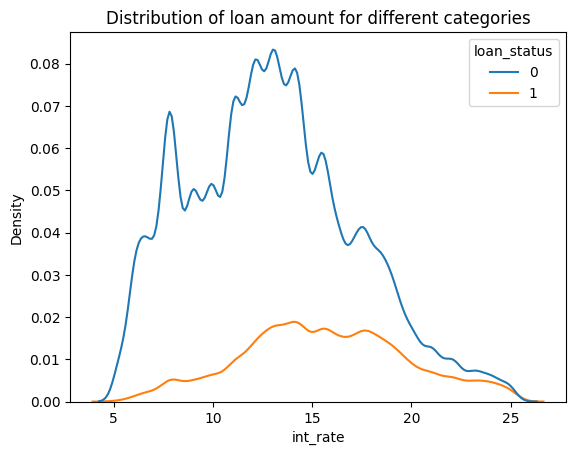

In [118]:
sns.kdeplot(data = df_eda, x = 'int_rate', hue = 'loan_status')
plt.title('Distribution of interest rate different categories')
plt.show()

In [ ]:
# This pair plot is provided for reference, didn't worked on my computer so sadly had to left it as it is.

In [122]:
sns.pairplot(df_eda, y_vars = df_eda['loan_status'])

## Insights
* The median loan amount for people who are beign charged off is higher than those who are successfully able to pay their debts.
* The distribution rate is also higher for those people who are being charged off.
* The distribution is installments is nearly same.
* The annual income is highly skewed for all the classes(Fully paid, charged off).
* Alot of outliers are also present in the data as well.

* The proportion of people who are charged off is higher when loan term is 60 months.
* Grade is a very eligent paremeter, as the customer loses its grades their chances fo being charged of is higher.
* The proportion of prople who are being charged of is higher when the application type is direct pay followed by individual and at last joint.
* No difference is the range of loan amount and interest rate for different classes.
* Basic and easy to understand barplot are also provided above.

## Encoding

In [39]:
# Libraries used
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce

### Mapping features that can direcly be mapped without any encoding technique

In [40]:
#Features where we can directly use one-hot encding
for col in df_train.columns:
  if df_train[col].dtype == 'O' and len(df_train[col].value_counts()) <= 2:
    print(col)

term
initial_list_status


In [41]:
#Mapping term 36months as 0 and 60 as 1
df_train['term'] = df_train['term'].map({' 36 months': 0, ' 60 months':1})
df_test['term'] = df_test['term'].map({' 36 months': 0, ' 60 months':1})

In [42]:
#Mapping term w as 0 and f as 1
df_train['initial_list_status'] = df_train['initial_list_status'].map({'w':0, 'f':1})
df_test['initial_list_status'] = df_test['initial_list_status'].map({'w':0, 'f':1})

## Feature engineerign

In [45]:

df_train['pub_rec'] = df_train['pub_rec'].apply(lambda x : 1 if x > 1 else 0)
df_train['mort_acc'] = df_train['mort_acc'].apply(lambda x : 1 if x > 1 else 0)
df_train['pub_rec_bankruptcies'] = df_train['pub_rec_bankruptcies'].apply(lambda x : 1 if x > 1 else 0)

df_test['pub_rec'] = df_test['pub_rec'].apply(lambda x : 1 if x > 1 else 0)
df_test['mort_acc'] = df_test['mort_acc'].apply(lambda x : 1 if x > 1 else 0)
df_test['pub_rec_bankruptcies'] = df_test['pub_rec_bankruptcies'].apply(lambda x : 1 if x > 1 else 0)


#Creating new feature as time lag --> 
import re

df_train['time_lag']= df_train['earliest_cr_line'].apply(lambda x : int(re.split('\-', x)[1])) - df_train['issue_d'].apply(lambda x : int(re.split('\-', x)[1]))
df_test['time_lag']= df_test['earliest_cr_line'].apply(lambda x : int(re.split('\-', x)[1])) - df_test['issue_d'].apply(lambda x : int(re.split('\-', x)[1]))

In [47]:
df_train.drop(['earliest_cr_line','issue_d','address'], axis =1, inplace = True)
df_test.drop(['earliest_cr_line','issue_d','address'], axis =1, inplace = True)


### OneHot Encoding for features that has less than 7 unique attributes

In [48]:
oh_target_col = ['grade', 'home_ownership', 'application_type','verification_status']
oh_target_drop = list()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

for col in oh_target_col:
  train_encoded_val = ohe.fit_transform(df_train[col].values.reshape(-1,1))
  categories = col+'_'+ohe.categories_[0]
  df_train[categories] = train_encoded_val

  df_test[categories] = ohe.transform(df_test[col].values.reshape(-1,1))

  #Appending column names to drop later
  oh_target_drop.append(categories[0])
  oh_target_drop.append(col)
print(oh_target_drop)

#Dropping one of the columns used in one hot encoding due to multicolinearity
df_train.drop(oh_target_drop, axis = 1, inplace = True)
df_test.drop(oh_target_drop, axis = 1, inplace = True)

['grade_A', 'grade', 'home_ownership_ANY', 'home_ownership', 'application_type_DIRECT_PAY', 'application_type', 'verification_status_Not Verified', 'verification_status']


In [49]:
for col in df_train.columns:
  if df_train[col].dtype == 'O':
    print(f"{col} : {len(df_train[col].value_counts())}")

sub_grade : 35
emp_title : 143187
emp_length : 11
purpose : 14
title : 40338


In [50]:
# ce_col = [col for col in df_train.columns if (len(df_train[col].value_counts()) > 7) and (df_train[col].dtype == 'O')]
# ce_col

### Target encoding features that has more than 7 unique attributes

In [51]:
ce_obj = ce.TargetEncoder() 

df_train = ce_obj.fit_transform(df_train,df_target_train)
df_test = ce_obj.transform(df_test)

C:\Users\yasee\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\yasee\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


## LogisticRegression Model

### 1. Standardizing the data 


In [52]:
num_high_range_col = ['loan_amnt', 'int_rate', 'installment','annual_inc', 'dti', 'open_acc', 'revol_bal', 'total_acc', 'time_lag' ]

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_train[num_high_range_col] = ss.fit_transform(df_train[num_high_range_col])
df_test[num_high_range_col] = ss.transform(df_test[num_high_range_col])


In [54]:
pd.DataFrame(df_target_train)

,loan_status
161123,0
147846,1
181196,1
262808,0
11470,0
...,...
326828,0
97478,0
371562,0
311119,0


In [55]:
temp = pd.concat([df_train, pd.DataFrame(df_target_train)], axis= 1)

In [56]:
temp

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,time_lag,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_INDIVIDUAL,application_type_JOINT,verification_status_Source Verified,verification_status_Verified,loan_status
161123,-1.209575,0,0.302555,-1.168683,0.244807,0.195661,0.193952,-0.522411,0.206842,0.228542,0.680569,1.304613,0,-0.289308,38.0,1.732229,1,1,0,-1.838376,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
147846,-1.089993,0,0.076833,-1.040408,0.172613,0.226504,0.195497,1.253503,0.291821,0.195661,-0.222678,-0.839854,0,0.421352,91.0,0.217618,0,1,0,0.523823,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
181196,-0.492078,0,-0.169003,-0.380780,0.198132,0.500000,0.197707,0.012762,0.206842,0.228542,0.292087,-0.060048,0,-0.098374,77.3,0.049328,1,0,0,-0.448847,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
262808,2.497496,1,1.196502,1.896059,0.340227,0.208333,0.206834,0.095478,0.206842,0.228542,-0.309909,0.329855,0,0.563943,58.2,0.049328,0,1,0,-0.031989,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
11470,-0.312703,0,-0.591393,-0.221063,0.107970,0.195661,0.189573,-0.648967,0.166877,0.192622,-0.346424,-0.644902,0,-0.197353,36.8,-0.623832,1,0,0,1.496493,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326828,1.182084,0,0.526041,1.640743,0.280404,0.267606,0.191153,1.667083,0.206842,0.228542,0.011629,0.914710,0,0.477598,76.1,0.217618,0,1,0,-0.170942,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
97478,0.225420,1,1.755219,0.021341,0.321024,0.000484,0.206834,0.128564,0.206842,0.228542,0.243907,0.329855,0,-0.472046,15.9,0.554199,0,1,0,-0.726753,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
371562,-0.492078,1,0.079068,-0.794138,0.235760,0.023323,0.195497,0.757206,0.168831,0.189448,-0.070023,0.329855,0,-0.120424,65.6,1.648084,0,1,0,-1.143612,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
311119,1.660416,0,-0.439422,1.967270,0.137263,0.250000,0.206834,0.591774,0.206842,0.228542,0.029887,-0.449951,0,0.237785,48.8,0.974924,0,1,0,-0.448847,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


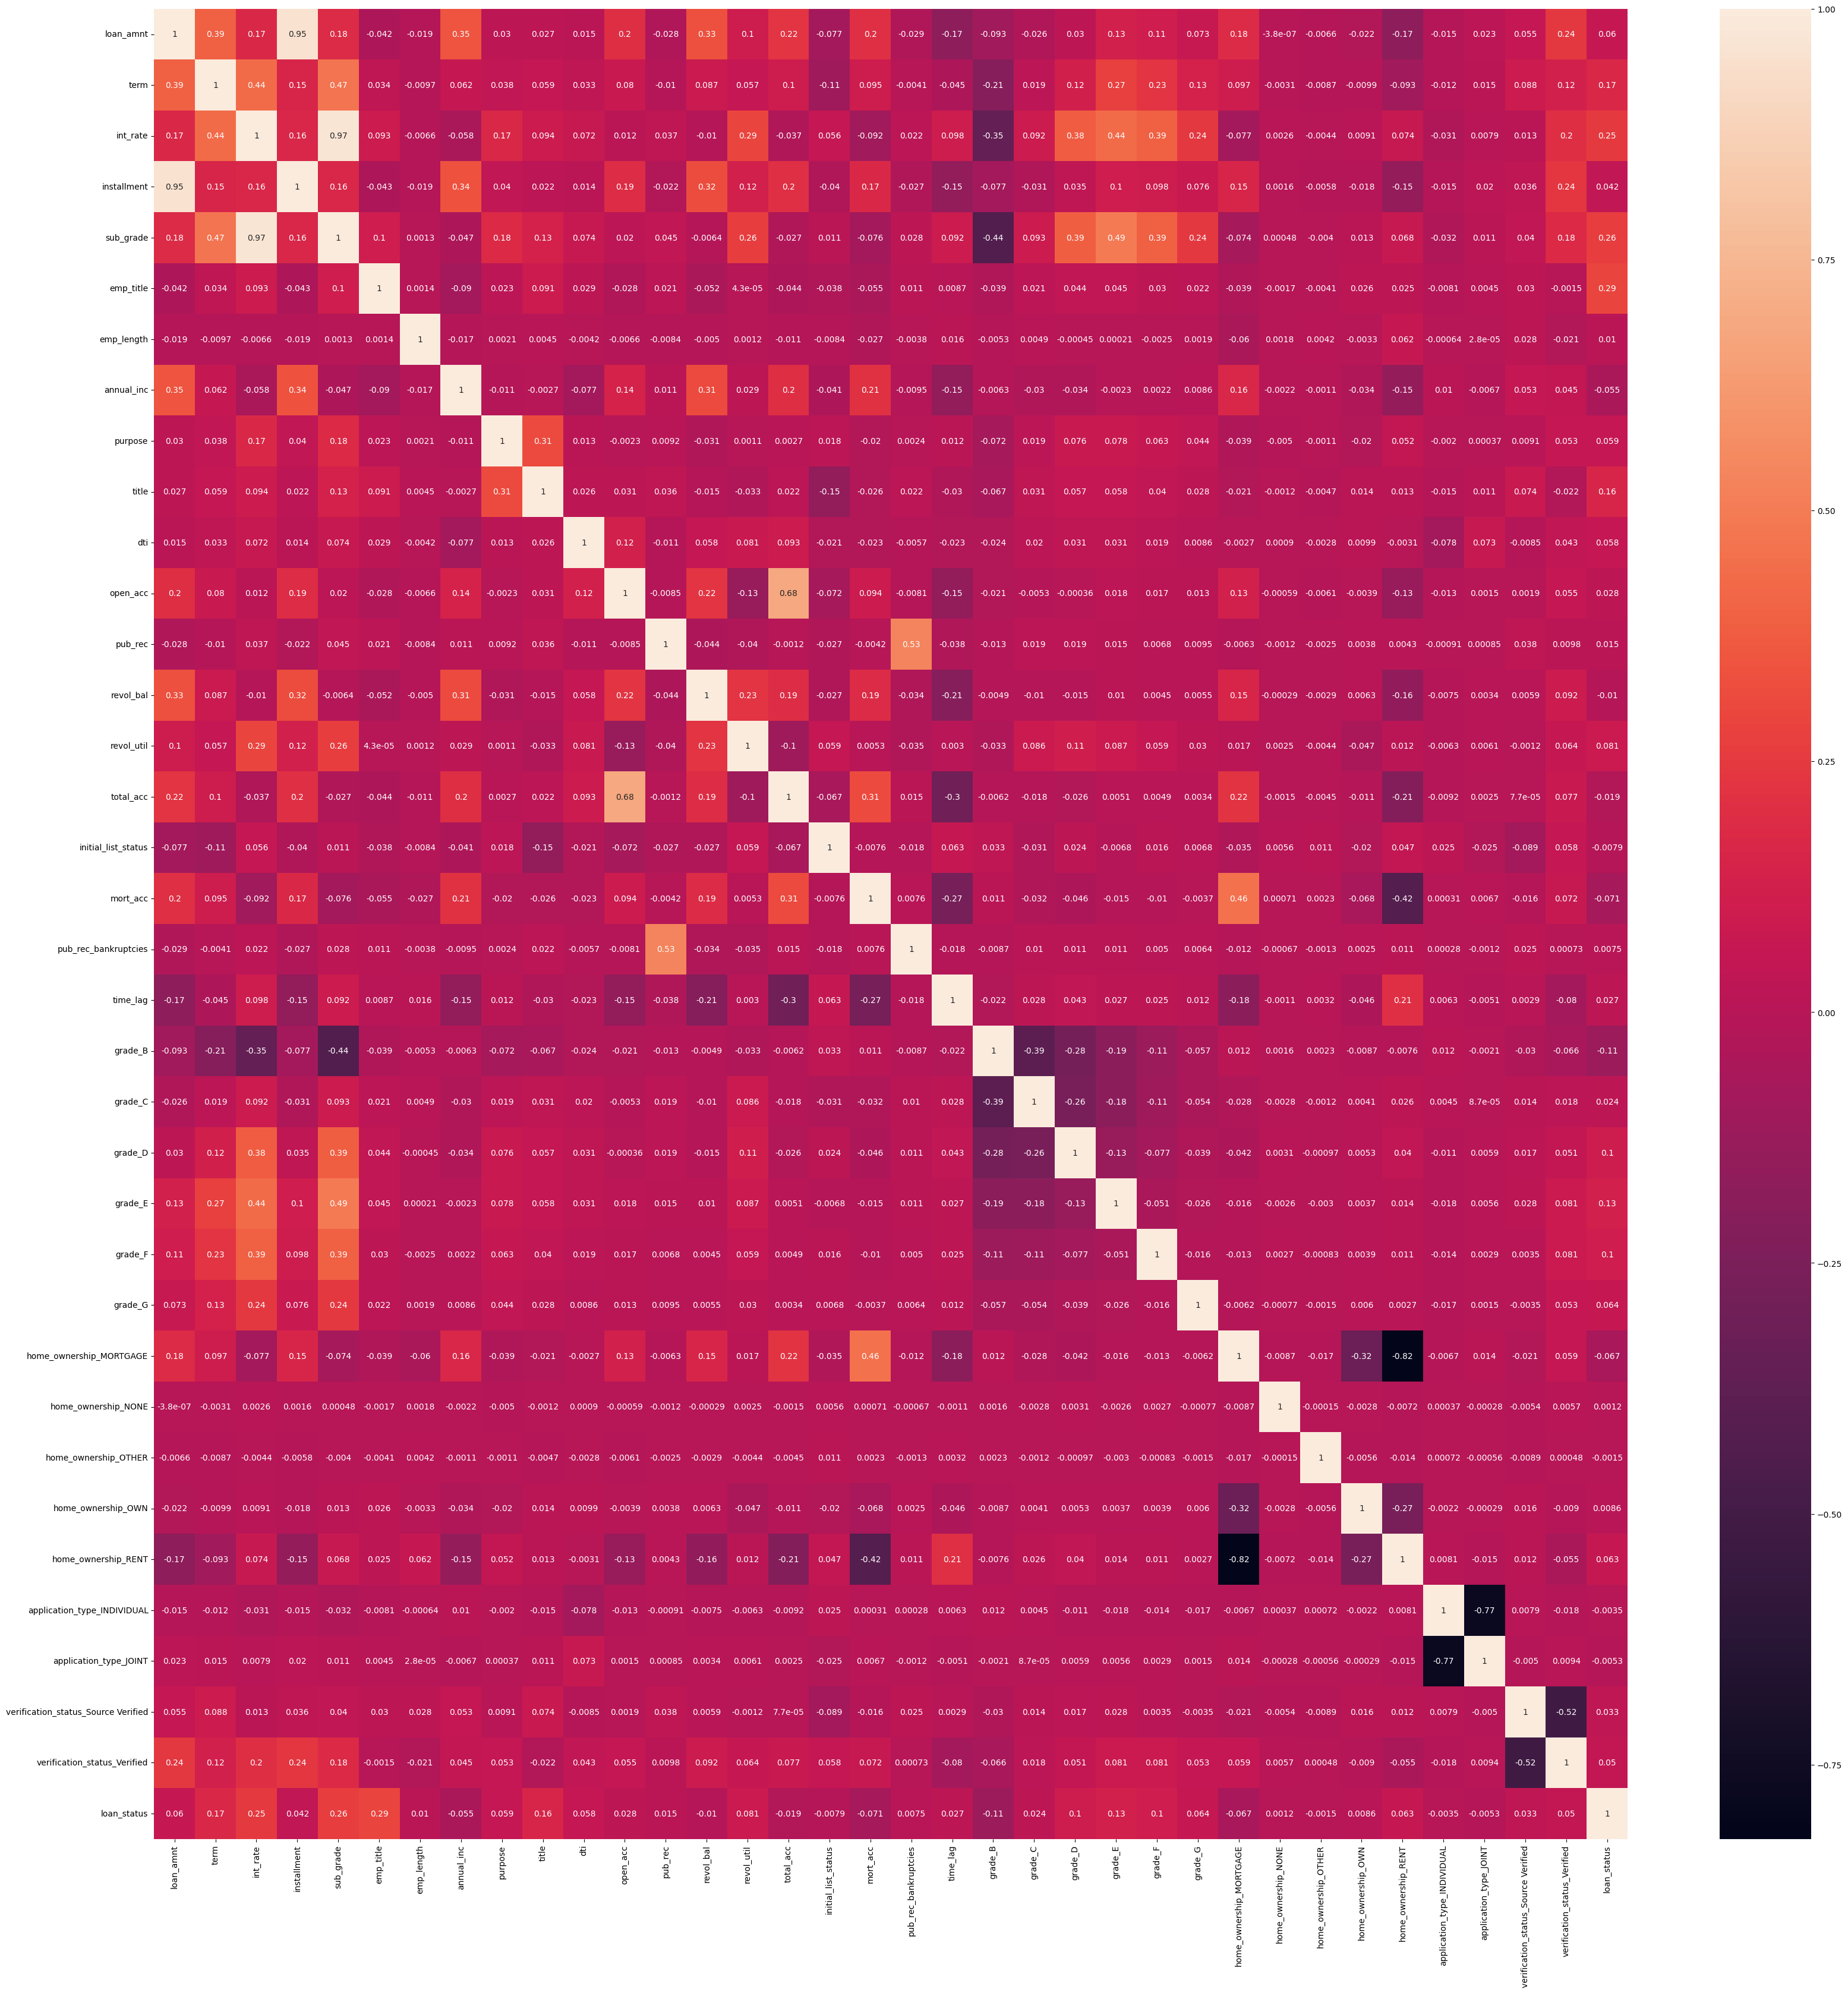

In [57]:
# Even after trying to inc the size its sill unvisible -_-
plt.figure(figsize = (40,40))
sns.heatmap(temp.corr(),annot=True)
plt.show()

In [58]:
x_train = df_train.values
x_test = df_test.values

y_train = df_target_train.values
y_test = df_target_test.values

In [59]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [60]:
# validating standardization
x_test.mean(axis = 0).round(0)

array([-0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
       -0., 54.,  0.,  1.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [61]:
x_train.std(axis = 0).round(0)

array([ 1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        1., 24.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

### 2. Model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay 
from sklearn import metrics

In [63]:
lr = LogisticRegression(n_jobs = -1)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train).reshape(-1,1)
y_pred_test = lr.predict(x_test).reshape(-1,1)

In [64]:
y_pred_test.shape

(79206, 1)

In [65]:
model_summary = pd.DataFrame(data = lr.coef_, columns = df_train.columns)
model_summary.sort_values(by=0, axis = 1,inplace=True)
model_summary['intercept'] = lr.intercept_
model_summary['train_score'] = lr.score(x_train, y_train)
model_summary['test_score'] = lr.score(x_test, y_test)
model_summary['Precision_score_train'] = precision_score(y_train, y_pred = y_pred_train)
model_summary['recall_score_train'] = recall_score(y_train, y_pred=y_pred_train)
model_summary['Precision_score_test'] = precision_score(y_test, y_pred = y_pred_test)
model_summary['recall_score_test'] = recall_score(y_test, y_pred=y_pred_test)
model_summary['f1_score'] = metrics.f1_score(y_train, y_pred_train)
model_summary['f1_score_train'] = metrics.f1_score(y_train, y_pred_train)
model_summary['f1_score_test'] = metrics.f1_score(y_test, y_pred_test)

In [66]:
model_summary.sort_values(by = 0, axis=1, ascending = False)

,emp_title,title,train_score,test_score,Precision_score_train,verification_status_Source Verified,grade_C,int_rate,grade_D,Precision_score_test,dti,verification_status_Verified,grade_B,term,pub_rec,grade_E,f1_score,f1_score_train,recall_score_train,open_acc,f1_score_test,sub_grade,installment,recall_score_test,pub_rec_bankruptcies,time_lag,loan_amnt,initial_list_status,revol_util,home_ownership_NONE,home_ownership_OTHER,mort_acc,total_acc,grade_G,revol_bal,grade_F,annual_inc,purpose,application_type_JOINT,emp_length,home_ownership_RENT,home_ownership_OWN,home_ownership_MORTGAGE,application_type_INDIVIDUAL,intercept
0,6.288638,1.627764,0.816583,0.795142,0.614607,0.463149,0.429219,0.422588,0.421733,0.41513,0.414953,0.378915,0.343011,0.342367,0.307224,0.305808,0.263607,0.263607,0.167785,0.163351,0.140663,0.121252,0.086524,0.084678,0.068609,0.024737,0.007566,0.005197,0.004124,-0.000179,-0.002552,-0.011803,-0.090921,-0.11424,-0.13295,-0.139082,-0.149467,-0.234337,-0.237042,-0.361134,-0.453259,-0.678862,-0.765656,-1.526462,-1.903305


In [67]:
model_summary

,application_type_INDIVIDUAL,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,emp_length,application_type_JOINT,purpose,annual_inc,grade_F,revol_bal,grade_G,total_acc,mort_acc,home_ownership_OTHER,home_ownership_NONE,revol_util,initial_list_status,loan_amnt,time_lag,pub_rec_bankruptcies,installment,sub_grade,open_acc,grade_E,pub_rec,term,grade_B,verification_status_Verified,dti,grade_D,int_rate,grade_C,verification_status_Source Verified,title,emp_title,intercept,train_score,test_score,Precision_score_train,recall_score_train,Precision_score_test,recall_score_test,f1_score,f1_score_train,f1_score_test
0,-1.526462,-0.765656,-0.678862,-0.453259,-0.361134,-0.237042,-0.234337,-0.149467,-0.139082,-0.13295,-0.11424,-0.090921,-0.011803,-0.002552,-0.000179,0.004124,0.005197,0.007566,0.024737,0.068609,0.086524,0.121252,0.163351,0.305808,0.307224,0.342367,0.343011,0.378915,0.414953,0.421733,0.422588,0.429219,0.463149,1.627764,6.288638,-1.903305,0.816583,0.795142,0.614607,0.167785,0.41513,0.084678,0.263607,0.263607,0.140663


### 3. HypterParameterTuning

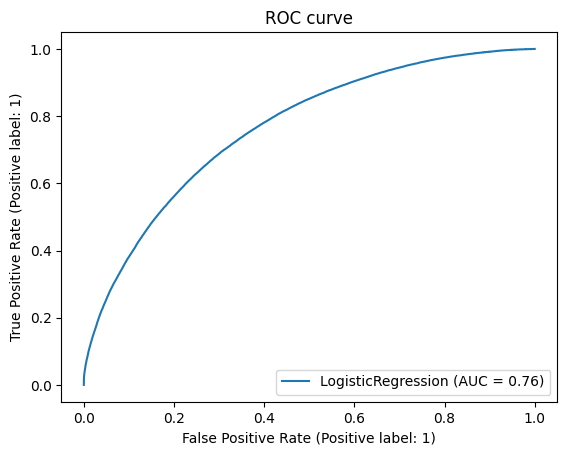

In [68]:
#ROC Curve
display = RocCurveDisplay.from_estimator(lr, x_train, y_train)
plt.title('ROC curve')
plt.show()

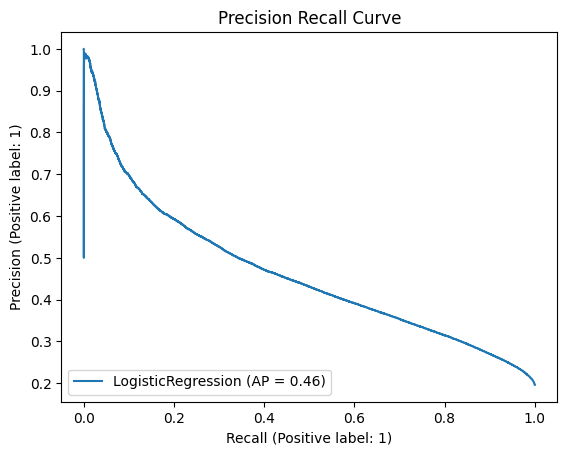

In [69]:
#Precision Recall Curve
display = PrecisionRecallDisplay.from_estimator(lr, x_train, y_train )
plt.title('Precision Recall Curve')
plt.show()

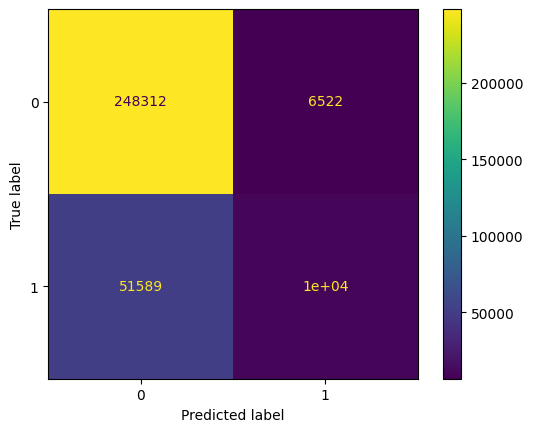

In [70]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train), display_labels = lr.classes_)
display.plot()
plt.show()

In [71]:
y_pred = lr.predict_proba(x_train)
df_y_pred = pd.DataFrame(data = y_pred, columns = ['0','1'])

y_pred = lr.predict_proba(x_test)
df_y_pred_test = pd.DataFrame(data = y_pred, columns = ['0','1'])

In [72]:
thres = 0.01
precision = list()
recall = list()
threshold = list()
f1_score = list()
max_f1 = -float('inf')
best_thres = None
index = None
i = 0
while thres <= 1:
    
    temp = df_y_pred['1'].apply(lambda x : 0 if x <= thres else 1)
    precision.append(precision_score(y_train, temp))
    recall.append(recall_score(y_train, temp))
    f1 = metrics.f1_score(y_train, temp)
    f1_score.append(f1)
    if f1> max_f1:
        max_f1 = f1
        best_thres = thres
        index = i
    
    threshold.append(thres)
    
    thres += 0.01
    i+=1

In [73]:
print(f'Best f1 score : {max_f1.round(2)} ')
print(f'Best threshold according to best f1 score : {round(best_thres,2)} ')
print(f'Best recall score : {recall[index].round(2)} ')
print(f'Best precision score : {precision[index].round(2)} ')


Best f1 score : 0.47 
Best threshold according to best f1 score : 0.24 
Best recall score : 0.62 
Best precision score : 0.39 


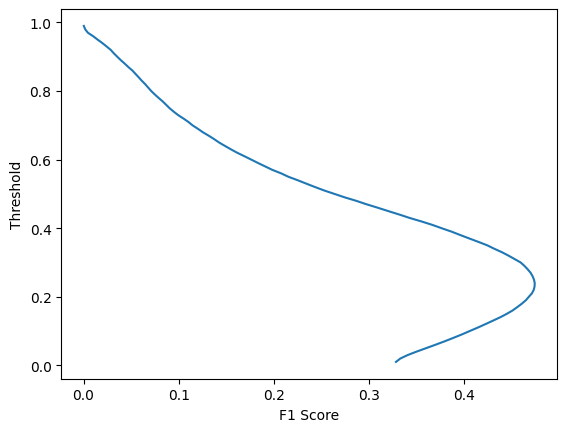

In [74]:
plt.plot(f1_score, threshold)
plt.xlabel('F1 Score')
plt.ylabel('Threshold')
plt.show()

### PR - Curve

In [75]:
from sklearn.metrics import precision_recall_curve, RocCurveDisplay

In [76]:
fpr, tpr, threshold = precision_recall_curve(y_train, df_y_pred['1'])

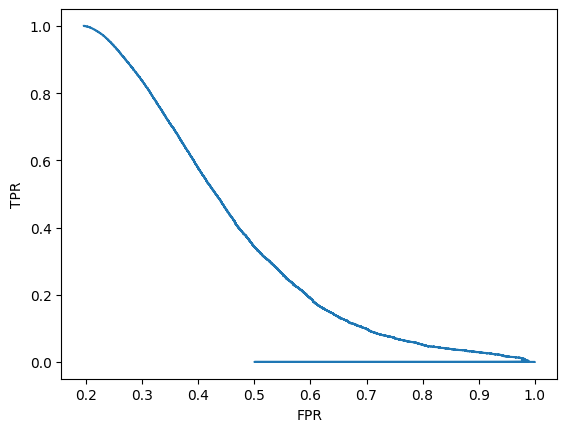

In [77]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

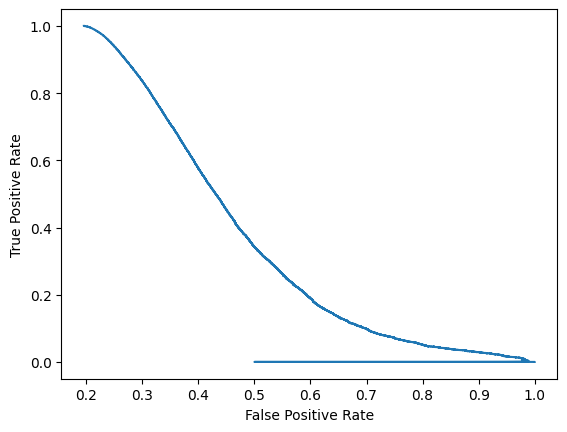

In [78]:
dis = RocCurveDisplay(fpr = fpr, tpr = tpr)
dis.plot()
plt.show()

In [79]:
## Results on unseen data
unseen_summary = pd.DataFrame()

In [80]:
y_test_pred = lr.predict(x_test)

unseen_summary['Accuracy'] = [lr.score(x_test,y_test)]
unseen_summary['F1_score'] = metrics.f1_score(y_test, y_test_pred)
unseen_summary['Precision'] = metrics.precision_score(y_test, y_test_pred)
unseen_summary['Recall'] = metrics.recall_score(y_test, y_test_pred)

In [81]:
unseen_summary

,Accuracy,F1_score,Precision,Recall
0,0.795142,0.140663,0.41513,0.084678


### Using Custom threshold (0.21)

In [82]:
y_predtrain_customthres = df_y_pred['1'].apply(lambda x : 0 if x < 0.21 else 1)
y_predtest_customthres = df_y_pred_test['1'].apply(lambda x : 0 if x < 0.21 else 1)


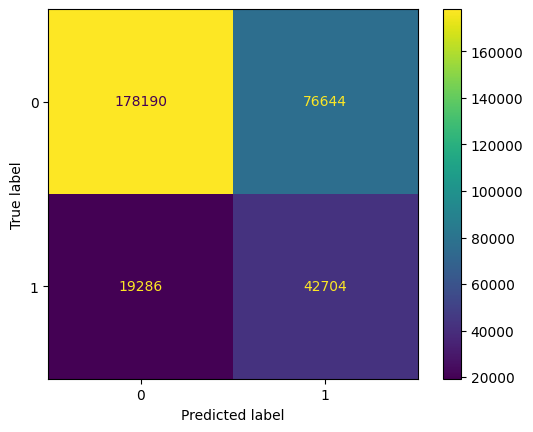

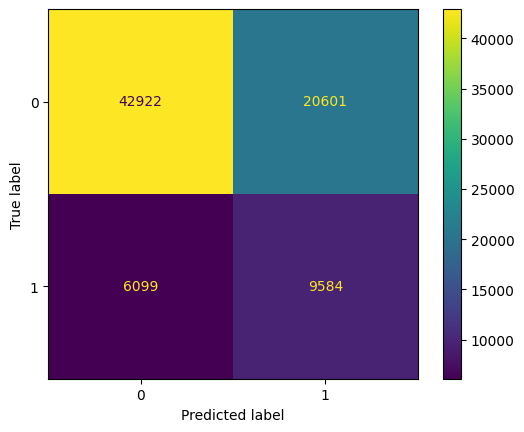

In [83]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_train, y_predtrain_customthres), display_labels = lr.classes_)
display.plot()
plt.show()

display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_predtest_customthres), display_labels = lr.classes_)
display.plot()
plt.show()

In [85]:
thres_21 = pd.DataFrame()

thres_21['Accuracy'] = [lr.score(x_train,y_predtrain_customthres)]
thres_21['F1_score'] = metrics.f1_score(y_train, y_predtrain_customthres)
thres_21['Precision'] = metrics.precision_score(y_train, y_predtrain_customthres)
thres_21['Recall'] = metrics.recall_score(y_train, y_predtrain_customthres)

thres_21['Accuracy_test'] = [lr.score(x_test,y_predtest_customthres)]
thres_21['F1_score_test'] = metrics.f1_score(y_test, y_predtest_customthres)
thres_21['Precision_test'] = metrics.precision_score(y_test, y_predtest_customthres)
thres_21['Recall_test'] = metrics.recall_score(y_test, y_predtest_customthres)

In [86]:
thres_21

,Accuracy,F1_score,Precision,Recall,Accuracy_test,F1_score_test,Precision_test,Recall_test
0,0.676713,0.470988,0.357811,0.688885,0.659293,0.417895,0.317509,0.611108


## Balancing the data then creating a new model

In [87]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

df_train_undersample, df_target_undersample = rus.fit_resample(df_train, df_target_train)

In [88]:
x_train = df_train_undersample.values
y_train = df_target_undersample.values

In [89]:
x_train.mean(axis = 0).round(0)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., 55., -0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [90]:
lr_undersample = LogisticRegression(n_jobs = -1)
lr_undersample.fit(x_train, y_train)

y_pred_train = lr_undersample.predict(x_train).reshape(-1,1)
y_pred_test = lr_undersample.predict(x_test).reshape(-1,1)

In [91]:
x_train.shape, y_pred_train.shape, x_test.shape, y_pred_test.shape

((123980, 35), (123980, 1), (79206, 35), (79206, 1))

In [92]:
model_summary_1 = pd.DataFrame(data = lr.coef_, columns = df_train.columns)
model_summary_1.sort_values(by=0, axis = 1,inplace=True)

model_summary_1['intercept'] = lr_undersample.intercept_
model_summary_1['train_score'] = lr_undersample.score(x_train, y_train)
model_summary_1['test_score'] = lr_undersample.score(x_test, y_test)
model_summary_1['Precision_score_train'] = precision_score(y_train, y_pred = y_pred_train)
model_summary_1['recall_score_train'] = recall_score(y_train, y_pred=y_pred_train)
model_summary_1['Precision_score_test'] = precision_score(y_test, y_pred = y_pred_test)
model_summary_1['recall_score_test'] = recall_score(y_test, y_pred=y_pred_test)
model_summary_1['f1_score_train'] = metrics.f1_score(y_train, y_pred_train)
model_summary_1['f1_score_test'] = metrics.f1_score(y_test, y_pred_test)


In [95]:
df_y_pred = pd.DataFrame(data = lr_undersample.predict_proba(x_train), columns = ['0','1'])
df_y_pred_test = pd.DataFrame(data = lr_undersample.predict_proba(x_test), columns = ['0','1'])

In [96]:
thres = 0.01
precision = list()
recall = list()
threshold = list()
f1_score = list()
max_f1 = -float('inf')
best_thres = None
index = None
i = 0
while thres <= 1:
    
    temp = df_y_pred['1'].apply(lambda x : 0 if x <= thres else 1)
    precision.append(precision_score(y_train, temp))
    recall.append(recall_score(y_train, temp))
    f1 = metrics.f1_score(y_train, temp)
    f1_score.append(f1)
    if f1> max_f1:
        max_f1 = f1
        best_thres = thres
        index = i
    
    threshold.append(thres)
    
    thres += 0.01
    i+=1

In [103]:
print(f'Best f1 score : {max_f1.round(2)} ')
print(f'Best threshold according to best f1 score : {round(best_thres,2)} ')
print(f'Best recall score : {recall[index].round(2)} ')
print(f'Best precision score : {precision[index].round(2)} ')


Best f1 score : 0.73 
Best threshold according to best f1 score : 0.36 
Best recall score : 0.87 
Best precision score : 0.63 


In [97]:
y_predtrain_customthres = df_y_pred['1'].apply(lambda x : 0 if x<best_thres else 1)
y_predtest_customthres = df_y_pred_test['1'].apply(lambda x : 0 if x<best_thres else 1)

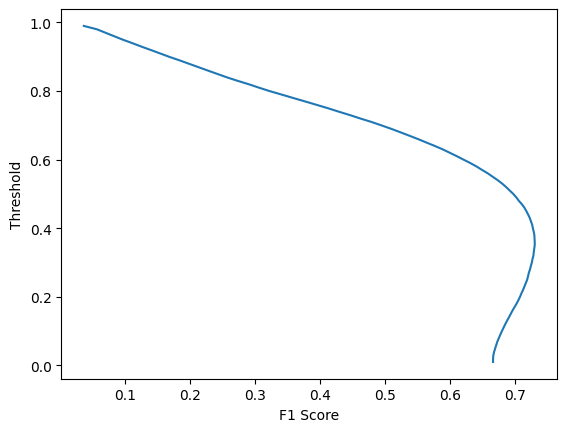

In [123]:
plt.plot(f1_score, threshold)
plt.xlabel('F1 Score')
plt.ylabel('Threshold')
plt.show()

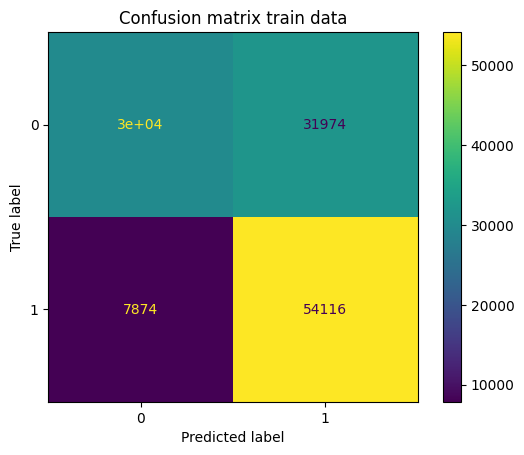

In [98]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_train, y_predtrain_customthres))
display.plot()
plt.title('Confusion matrix train data')
plt.show()

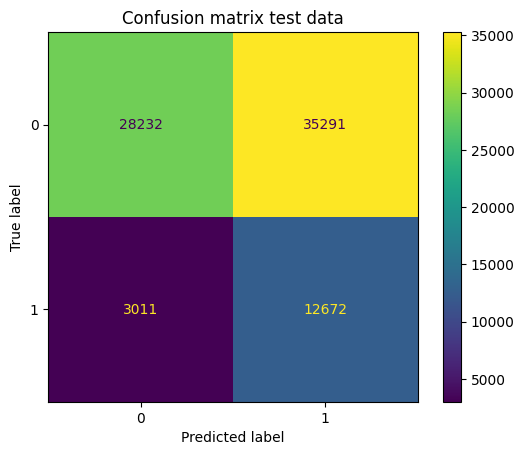

In [99]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_predtest_customthres), display_labels = lr.classes_)
display.plot()
plt.title('Confusion matrix test data')
plt.show()

In [101]:
thres_37 = pd.DataFrame()

thres_37['Accuracy_train'] = [lr_undersample.score(x_train,y_predtrain_customthres)]
thres_37['F1_score_train'] = metrics.f1_score(y_train, y_predtrain_customthres)
thres_37['Precision_train'] = metrics.precision_score(y_train, y_predtrain_customthres)
thres_37['Recall_train'] = metrics.recall_score(y_train, y_predtrain_customthres)

thres_37['Accuracy_test'] = [lr_undersample.score(x_test,y_predtest_customthres)]
thres_37['F1_score_test'] = metrics.f1_score(y_test, y_predtest_customthres)
thres_37['Precision_test'] = metrics.precision_score(y_test, y_predtest_customthres)
thres_37['Recall_test'] = metrics.recall_score(y_test, y_predtest_customthres)

In [102]:
thres_37

,Accuracy_train,F1_score_train,Precision_train,Recall_train,Accuracy_test,F1_score_test,Precision_test,Recall_test
0,0.802234,0.730902,0.628598,0.87298,0.772934,0.398203,0.264204,0.808009


## Insights
* There is always precision recall trade of present irrespective of training the model on balanced or imbalanced data.
* Its according to the business, one need to decide the threshold/risk for judging whether to provide the loan or not.
* According to the model, the model trained with balanced data and using a threshold of 0.37 worked the best.
* To further enhance the output, different models like Decision Tree can be utilized.

## NPA - non performing assets.
* When the purpose is small_business, nearly 28% of the times people are charged off, hence while aproving loans for small_business precaution need to taken.
* Some of the major purpose when people are charged of are
    * Moving
    * Medical
    * Debt Consolidation
    * Other

In [132]:
df_eda.groupby(['purpose'])['loan_status'].value_counts(normalize = True).sort_values(ascending=False)

purpose             loan_status
wedding             0              0.878621
car                 0              0.867092
educational         0              0.845771
major_purchase      0              0.837356
credit_card         0              0.833721
home_improvement    0              0.833307
vacation            0              0.811016
house               0              0.803309
debt_consolidation  0              0.795723
other               0              0.791852
medical             0              0.786411
moving              0              0.779483
renewable_energy    0              0.776173
small_business      0              0.716968
                    1              0.283032
renewable_energy    1              0.223827
moving              1              0.220517
medical             1              0.213589
other               1              0.208148
debt_consolidation  1              0.204277
house               1              0.196691
vacation            1              0.188984


# Actionable Insights
* Do not blindly follow the model, there is a very high tradeoff of precision and recall.
* Location doesn't affect someone creadiblity to apply for loan or not.
* Only 20% of customers are not being able to payback loans, if loan amount is not sufficiently large, loan can be provided.
* Most of the time reason of loan is debt consolidation, which is just taking loan to payback loan, strict actions need to taken against such action.
* There is lack of student/study loan in the data, we can work on these fields as well such as awareness campaing, competative interest rates etc.

# Recommndation

* We can not completely rely on the model, while using the model major thing need to checked are as follow:
    * The is a very high precison-recall trade off meaning if model says we should not provide the loan this needs be rechecked manually.
    * Through model either we can prevent loss form happening and loose potentional customer or gain customer even involving those who won't be ale to pay loans.
* There is a high trade off between losing customers and incorrectly providing loan to customer which will be unable to pay back in future.
* Most of the loan are regarding debt consolidation, while accepting someone these application we need to double check their potential income/net-worth otherwise is can impact the business very much.
* CIBIL score needs to be introduced which can enhance the model as well as provide ease while judging wheather to provide loan or not.
* People who takes longer term loan are also unable to pay or being charged off, while hence while providing longer term loan a better background check need to be done.
* Some of the most important features are :
    * Term
    * interest rate
    * Title/Profession
    * Grade
    * Having home ownership as mortage or not
* Location is independent of whether to give someone loan or not and hence not needed.